#Import Libraries and Datasets

In [53]:
 #Importing Libraries
 import numpy as np #Used for numerical calculations and creating arrays
 import pandas as pd #Used for manipulation of data
 import matplotlib.pyplot as plt #Used for static,dynamic & Interactive visualizations of data
 import seaborn as sns #Used for statistical representation of data
 import warnings
 warnings.filterwarnings('ignore')

In [54]:
#Load the Dataset
df = pd.read_csv('walmart.csv')

In [55]:
df.head() #Check for the top five roes in the dataset

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [56]:
df.info() #Provide the summary and structure of the dataset with total number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Data Preprocessing - Checking for null values and data cleanup

In [57]:
df.isnull().sum() #Check for the null values in the dataset

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [58]:
df.shape # Checking the total number of rows and columns

(6435, 8)

In [59]:
df.duplicated().sum() #Check for the duplicate values in the dataset

0

#Checking for Outliers

In [60]:
  num_columns=df.select_dtypes(include=np.number).columns #Selecting the numerical columns for finding outliers
  num_columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [61]:
  num_columns = num_columns.drop('Holiday_Flag') #Dropping the Holiday_column as it has been categorical

In [62]:
num_columns #Recheck if the Holiday column is being removed

Index(['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

# Checking for Outliers using Boxplot

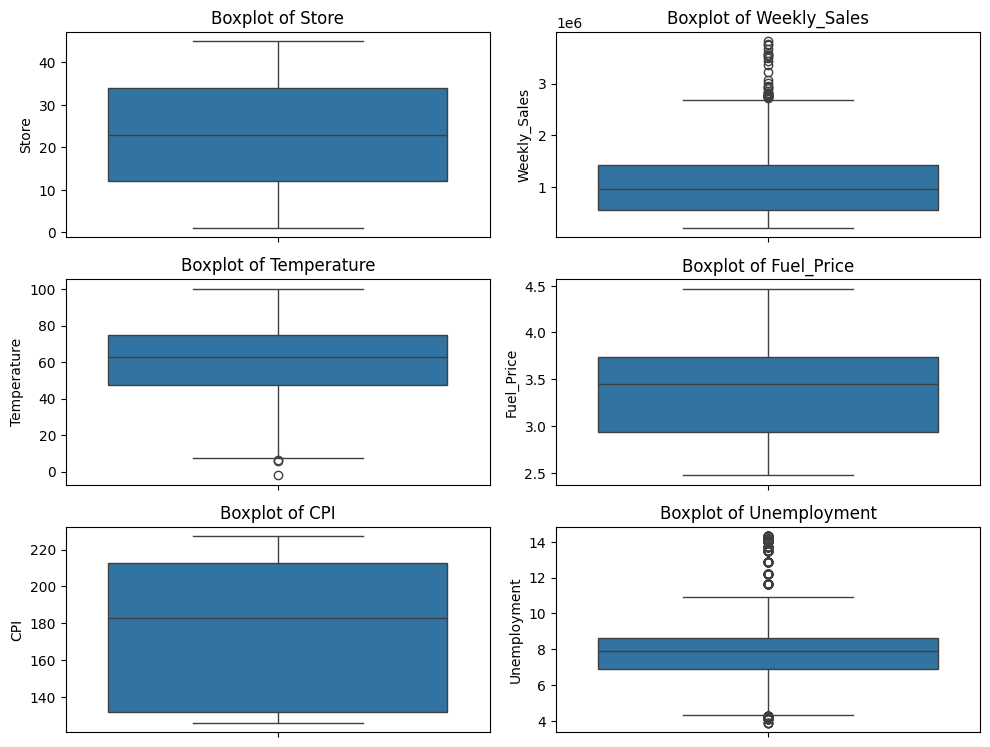

In [63]:
# Checking for Outliers using Boxplot
plt.figure(figsize=(10, 10)) # Used for creating figure
for i, col in enumerate(num_columns):
    plt.subplot(4, 2, i + 1) # Creates grid of subplots inside the figure
    sns.boxplot(data=df[col]) # Creates boxplot which showcases mean,quartiles and outliers to categorise the data accordingly
    plt.title(f'Boxplot of {col}') #Provides titles to the boxplots
plt.tight_layout() #Adjusts the subplots accordingly to avoid overspacing and overlapping of the plots within the grid.
plt.show() # Showcase the final plots within the grid

# Observation : From the above plot we observe that the data points "Weekly Sales" & "Unemployement" has more number of outliers



Original DataFrame shape: (6435, 8)
DataFrame shape after removing outliers: (5920, 8)


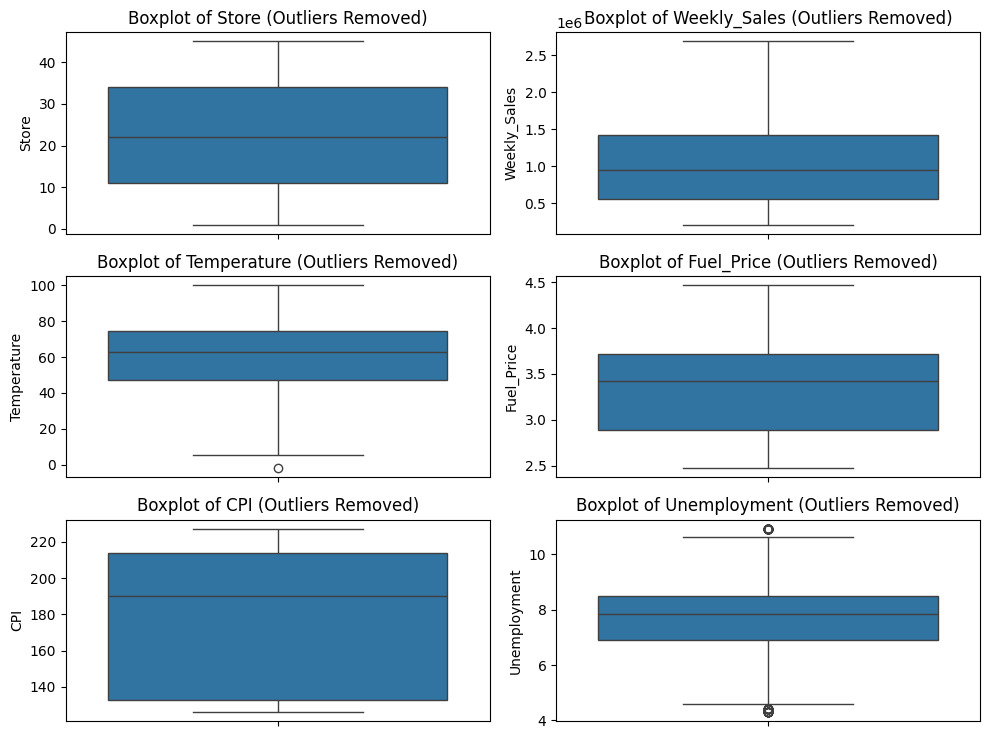

In [64]:
# Calculate IQR for 'Weekly_Sales'
Q1_sales = df['Weekly_Sales'].quantile(0.25) #Setting Q1 to 0.25 represents the values are considered below 25% of the total datapoints.
Q3_sales = df['Weekly_Sales'].quantile(0.75) #Setting Q1 to 0.75 represents the values are considered below 75% of the total datapoints.
IQR_sales = Q3_sales - Q1_sales # Total Inter Quantile Range after subtracting Q3 and Q1
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Calculate IQR for 'Unemployment'
Q1_unemployment = df['Unemployment'].quantile(0.25) #Setting Q1 to 0.25 represents the values are considered below 25% of the total datapoints.
Q3_unemployment = df['Unemployment'].quantile(0.75) #Setting Q1 to 0.75 represents the values are considered below 75% of the total datapoints.
IQR_unemployment = Q3_unemployment - Q1_unemployment
lower_bound_unemployment = Q1_unemployment - 1.5 * IQR_unemployment
upper_bound_unemployment = Q3_unemployment + 1.5 * IQR_unemployment

# Remove outliers
df_no_outliers = df[
    (df['Weekly_Sales'] >= lower_bound_sales) & (df['Weekly_Sales'] <= upper_bound_sales) &
    (df['Unemployment'] >= lower_bound_unemployment) & (df['Unemployment'] <= upper_bound_unemployment)
]

# Print the shape of the original and the new dataframes
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)


# Optional: Recheck for outliers using boxplots (after removing outliers)
plt.figure(figsize=(10, 10))
for i, col in enumerate(num_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df_no_outliers[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.tight_layout()
plt.show()

# We observe "Weekly Sales" as our target variable

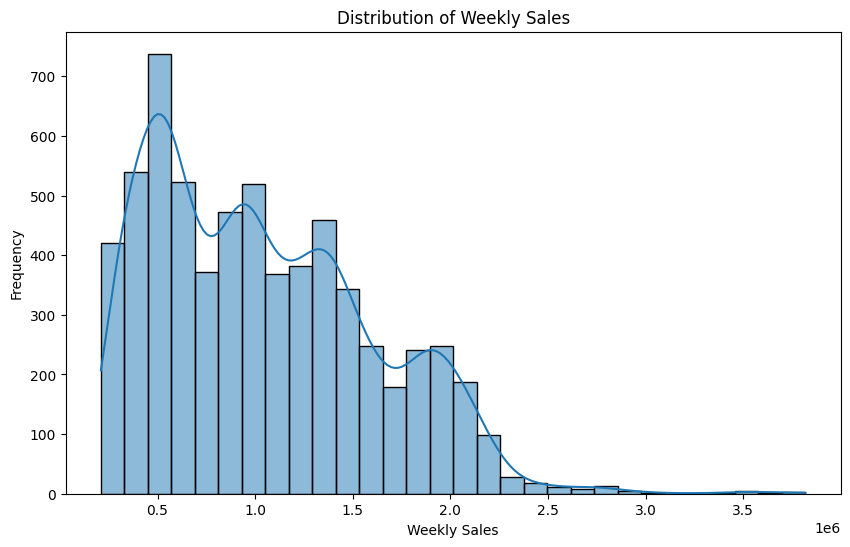

In [92]:
# Plot the distribution of weekly sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

Correlation between Weekly Sales and Unemployment:
               Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.106176
Unemployment     -0.106176      1.000000


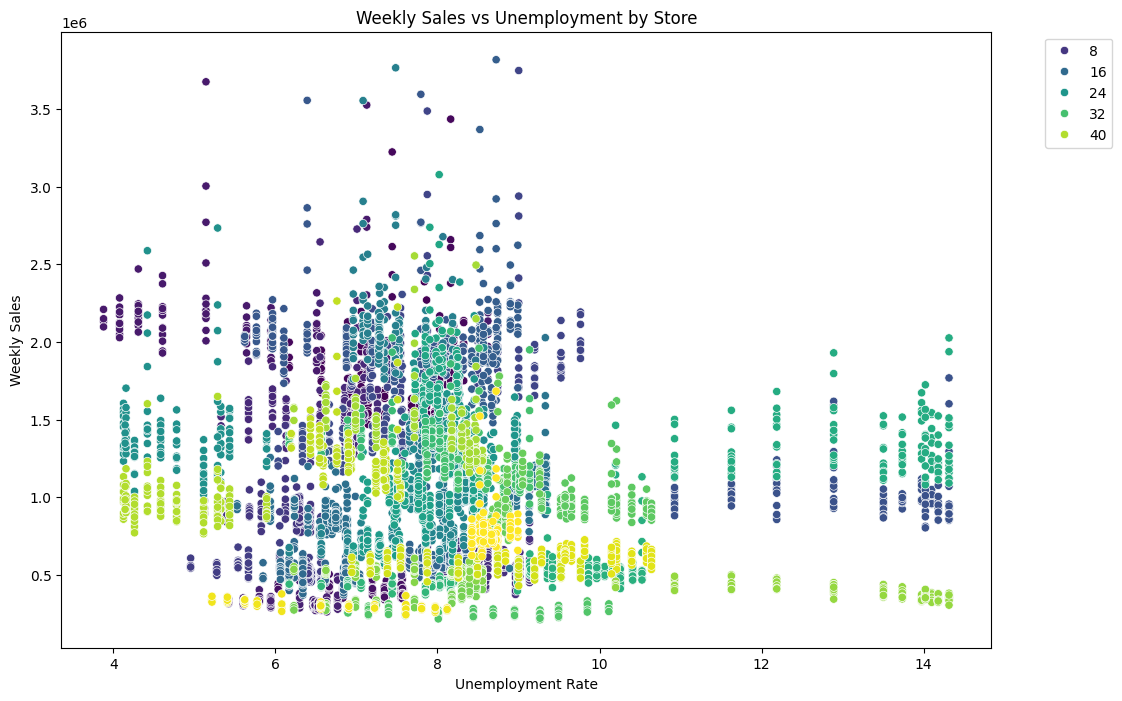

In [93]:
# Calculate correlation between Weekly Sales and Unemployment
correlation = df[['Weekly_Sales', 'Unemployment']].corr()
print('Correlation between Weekly Sales and Unemployment:\n', correlation)

# Visualize the relationship between Weekly Sales and Unemployment for each store
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', hue='Store', palette='viridis')
plt.title('Weekly Sales vs Unemployment by Store')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


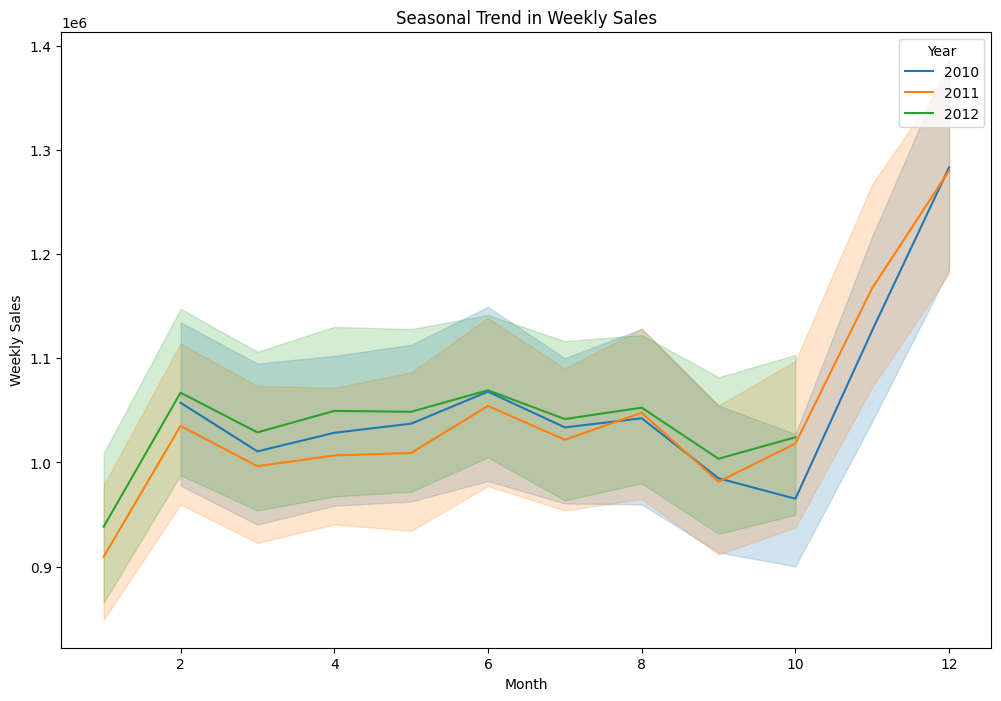

In [95]:
# Convert Date to datetime format and extract year and month
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Specify the correct format: day-month-year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Plot seasonal trend
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Month', y='Weekly_Sales', hue='Year', palette='tab10')
plt.title('Seasonal Trend in Weekly Sales')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

Correlation between Weekly Sales and CPI:
               Weekly_Sales       CPI
Weekly_Sales      1.000000 -0.072634
CPI              -0.072634  1.000000


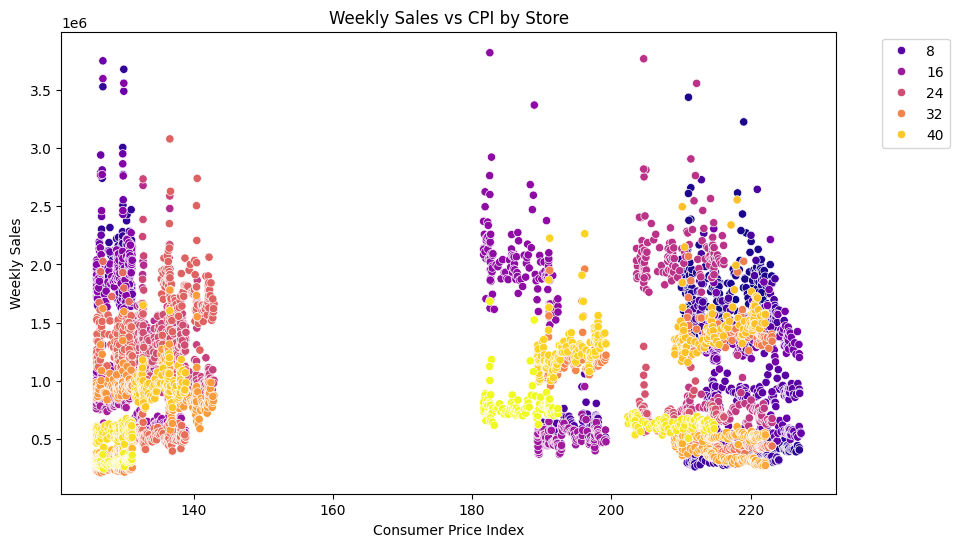

In [97]:
# Calculate correlation between Weekly Sales and CPI
correlation = df[['Weekly_Sales', 'CPI']].corr()
print('Correlation between Weekly Sales and CPI:\n', correlation)

# Visualize the relationship between Weekly Sales and CPI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', hue='Store', palette='plasma')
plt.title('Weekly Sales vs CPI by Store')
plt.xlabel('Consumer Price Index')
plt.ylabel('Weekly Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Top Performing Stores:
     Store  Weekly_Sales
19     20  2.107677e+06
3       4  2.094713e+06
13     14  2.020978e+06
12     13  2.003620e+06
1       2  1.925751e+06


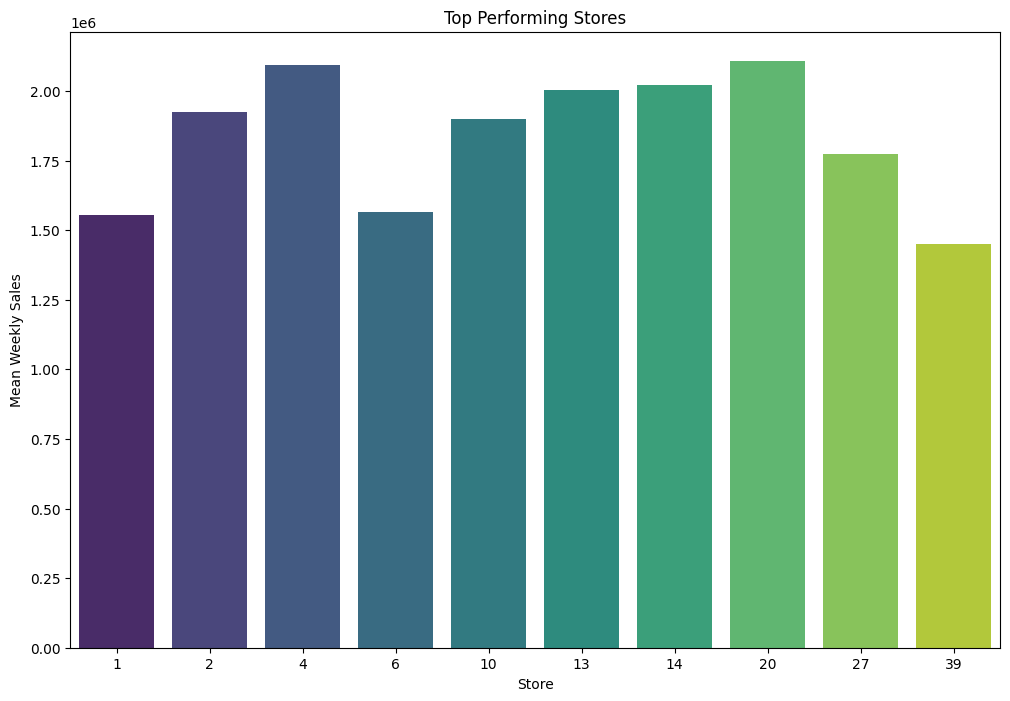

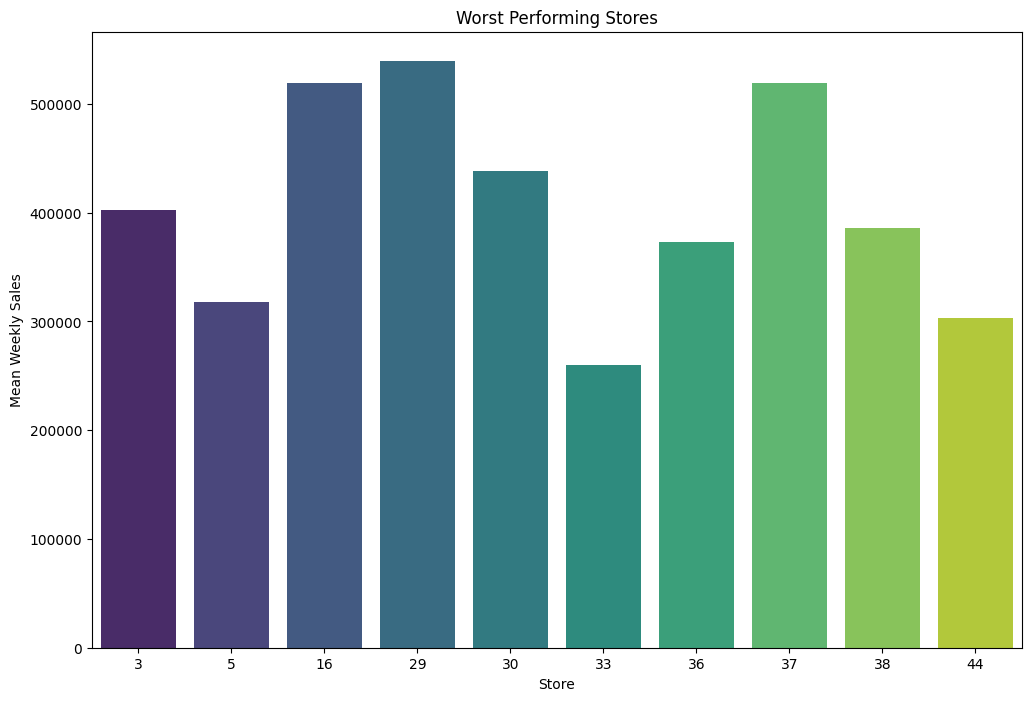

In [98]:
# Group by Store and calculate mean weekly sales
store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Sort stores by mean weekly sales
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False)
print('Top Performing Stores:\n', top_stores.head())

# Plot top performing stores
plt.figure(figsize=(12, 8))
sns.barplot(data=top_stores.head(10), x='Store', y='Weekly_Sales', palette='viridis')
plt.title('Top Performing Stores')
plt.xlabel('Store')
plt.ylabel('Mean Weekly Sales')
plt.show()

# Plot worst performing stores
plt.figure(figsize=(12, 8))
sns.barplot(data=top_stores.tail(10), x='Store', y='Weekly_Sales', palette='viridis')
plt.title('Worst Performing Stores')
plt.xlabel('Store')
plt.ylabel('Mean Weekly Sales')
plt.show()


In [102]:
from scipy.stats import ttest_ind
top_sales = top_10_stores['Weekly_Sales']
bottom_sales = bottom_10_stores['Weekly_Sales']
t_statistic, p_value = ttest_ind(top_sales, bottom_sales)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in sales performance between the top 10 stores and the bottom 10 stores.")
else:
    print("There is no significant difference in sales performance between the top 10 stores and the bottom 10 stores.")


T-statistic: 19.764952964014874
P-value: 1.181185637243922e-13
There is a significant difference in sales performance between the top 10 stores and the bottom 10 stores.


In [103]:
mean_difference = top_sales.mean() - bottom_sales.mean()
print("Mean difference in sales performance:", mean_difference)

Mean difference in sales performance: 207363065.07399994


In [105]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  
0  211.096358         8.106  2010      2  
1  211.242170         8.106  2010      2  
2  211.289143         8.106  2010      2  
3  211.319643         8.106  2010      2  
4  211.350143         8.106  2010      3

In [108]:
df_stores_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date', inplace=True)

In [109]:
from statsmodels.tsa.stattools import adfuller

In [110]:
def adf_test(series, title=''):
    print(f'Results of Dickey-Fuller Test:'.format(title))
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string())
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [111]:
adf_test(df_stores_sales['Weekly_Sales'],title='ADF TEST')

Results of Dickey-Fuller Test:
ADF Test Statistic            -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
Reject the null hypothesis
Data has no unit root and is stationary


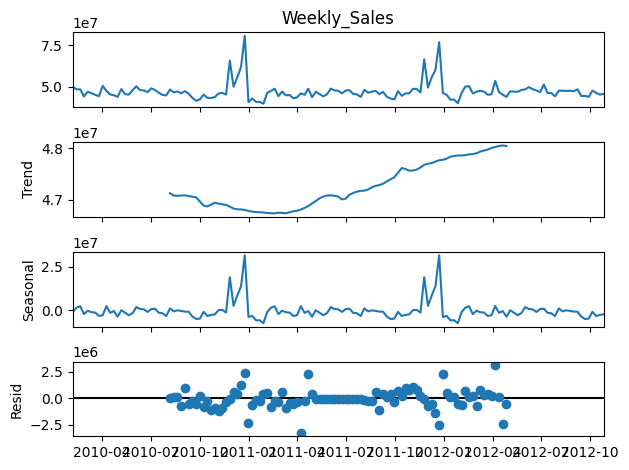

In [112]:
#Import seasonal decompose of the time series data

from statsmodels.tsa.seasonal import seasonal_decompose
# Assuming 'df_stores_sales' is your DataFrame with a DatetimeIndex and 'Weekly_Sales' column
result = seasonal_decompose(df_stores_sales['Weekly_Sales'], model='additive') # or 'multiplicative'
result.plot()
plt.show()

In [113]:
mean1=df_stores_sales['Weekly_Sales'].mean()
std1=df_stores_sales['Weekly_Sales'].std()

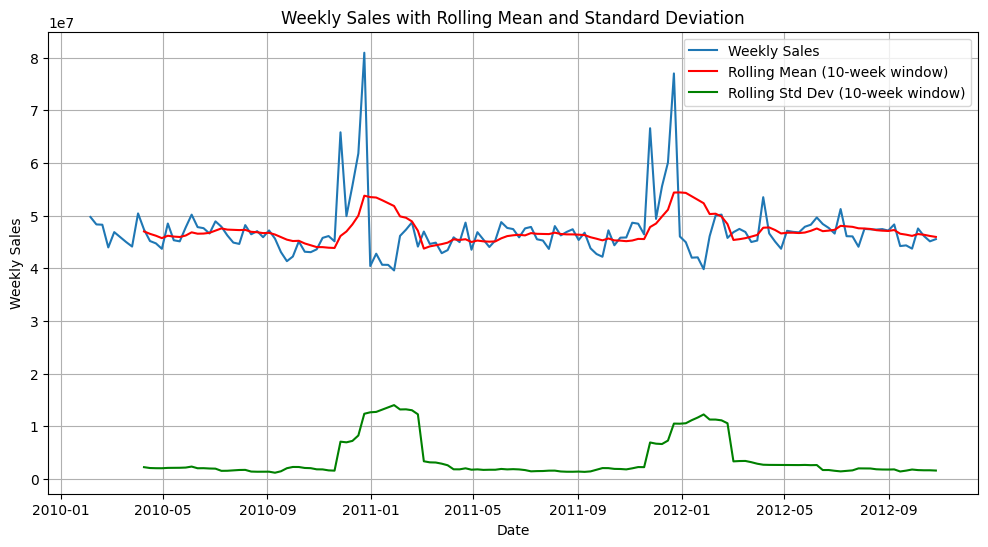

In [114]:
# Plot the rolling mean and standard deviation with Weekly sales

# Calculate the rolling mean and standard deviation
rolling_mean = df_stores_sales['Weekly_Sales'].rolling(window=10).mean()  # Example window size of 10
rolling_std = df_stores_sales['Weekly_Sales'].rolling(window=10).std()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_stores_sales['Weekly_Sales'], label='Weekly Sales')
plt.plot(rolling_mean, label='Rolling Mean (10-week window)', color='red')
plt.plot(rolling_std, label='Rolling Std Dev (10-week window)', color='green')
plt.title('Weekly Sales with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

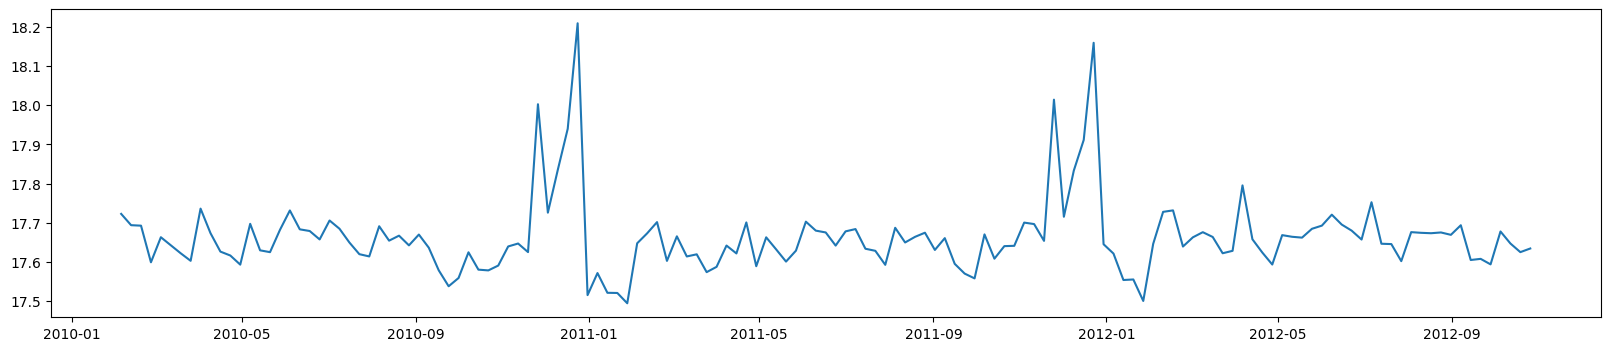

In [119]:
df_log = np.log(df_stores_sales)# applying transformation to Weekly sales
plt.figure(figsize=(20,4))
plt.plot(df_log)

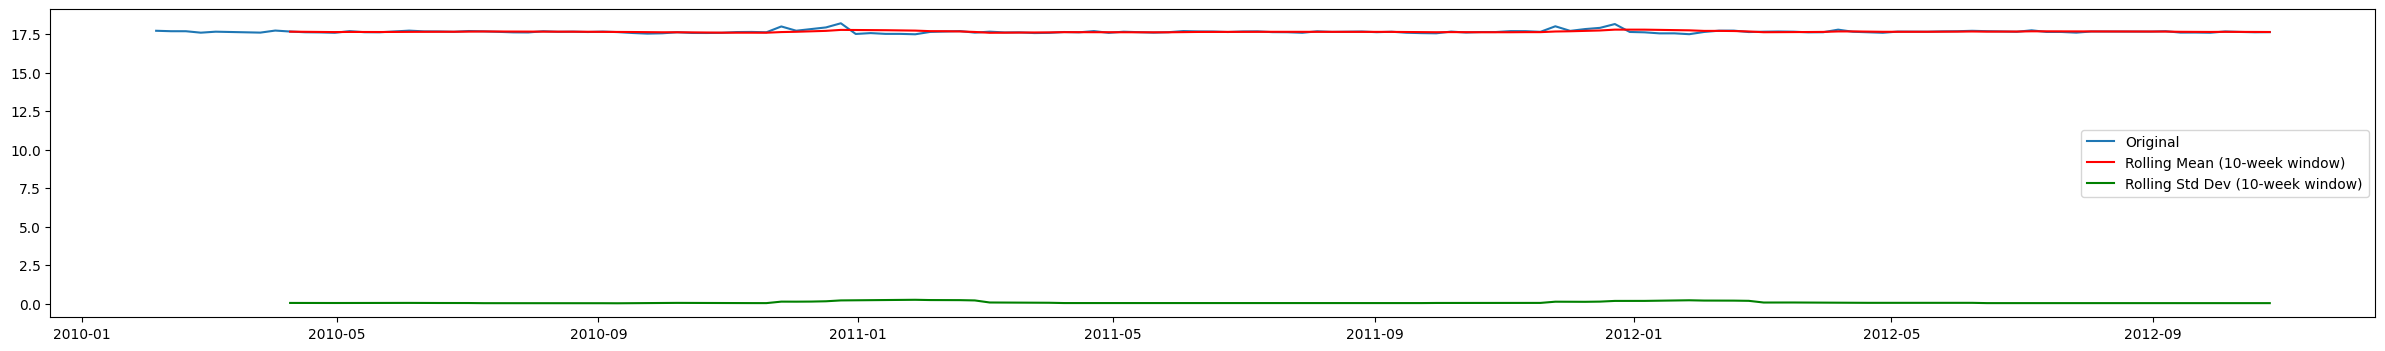

In [124]:
# Comparing the data with rolling mean and standard deviation
mean_log=df_log.rolling(window=10).mean()
std_log=df_log.rolling(window=10).std()
plt.figure(figsize=(30, 4))
plt.plot(df_log, label='Original')
plt.plot(mean_log, label='Rolling Mean (10-week window)', color='red')
plt.plot(std_log, label='Rolling Std Dev (10-week window)', color='green')
plt.legend(loc = 'best')
plt.show()

In [125]:
# Subtract log and mean data
df_new=df_log-mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.008682
2010-04-16     -0.028843
2010-04-23     -0.031090
2010-04-30     -0.044419
2010-05-07      0.049930
2010-05-14     -0.014386
2010-05-21     -0.017260
2010-05-28      0.033577
2010-06-04      0.070372
2010-06-11      0.027454
2010-06-18      0.022628

In [126]:
df_new.dropna(inplace=True) # Drops the NaN values

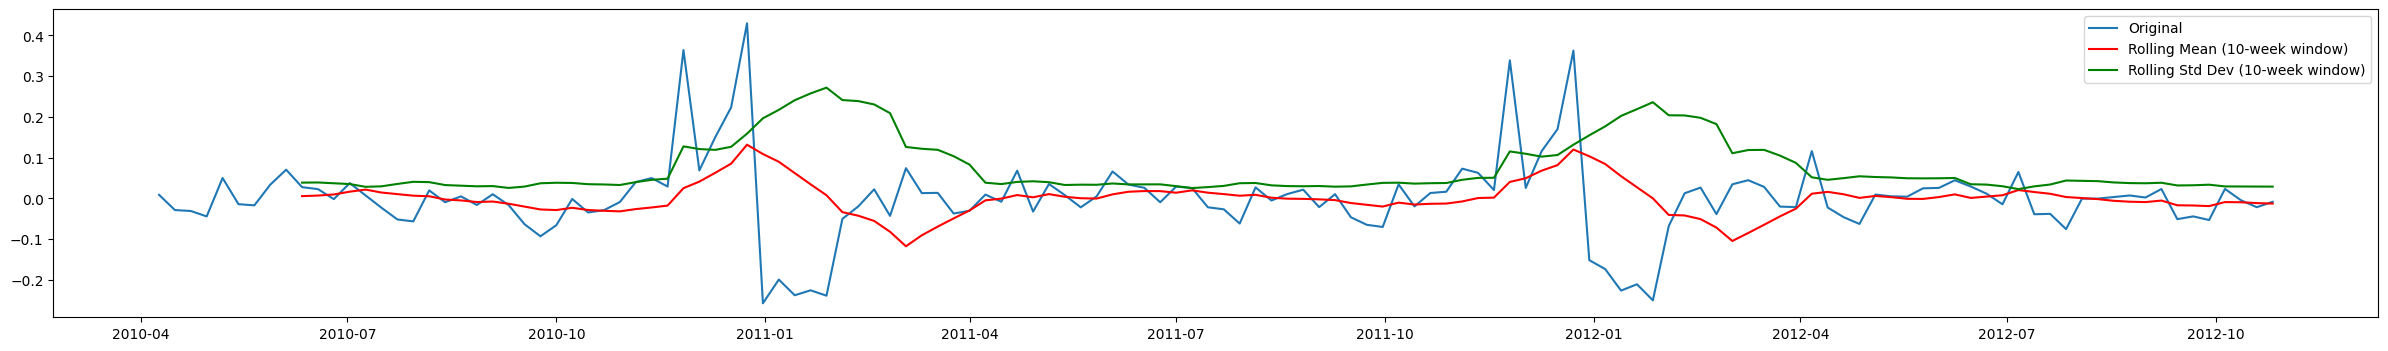

In [127]:
# Check for rolling mean and standard deviation post removing NaN
mean2=df_new.rolling(window=10).mean()
std2=df_new.rolling(window=10).std()
plt.figure(figsize=(30, 4))
plt.plot(df_new, label='Original')
plt.plot(mean2, label='Rolling Mean (10-week window)', color='red')
plt.plot(std2, label='Rolling Std Dev (10-week window)', color='green')
plt.legend(loc = 'best')
plt.show()

In [128]:
# Check for data stationarity using ADF test
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Results of Dickey-Fuller Test:
ADF Test Statistic            -6.941663e+00
p-value                        1.021389e-09
#Lags Used                     4.000000e+00
Number of Observations Used    1.290000e+02
Critical Value (1%)           -3.482088e+00
Critical Value (5%)           -2.884219e+00
Critical Value (10%)          -2.578864e+00
Reject the null hypothesis
Data has no unit root and is stationary


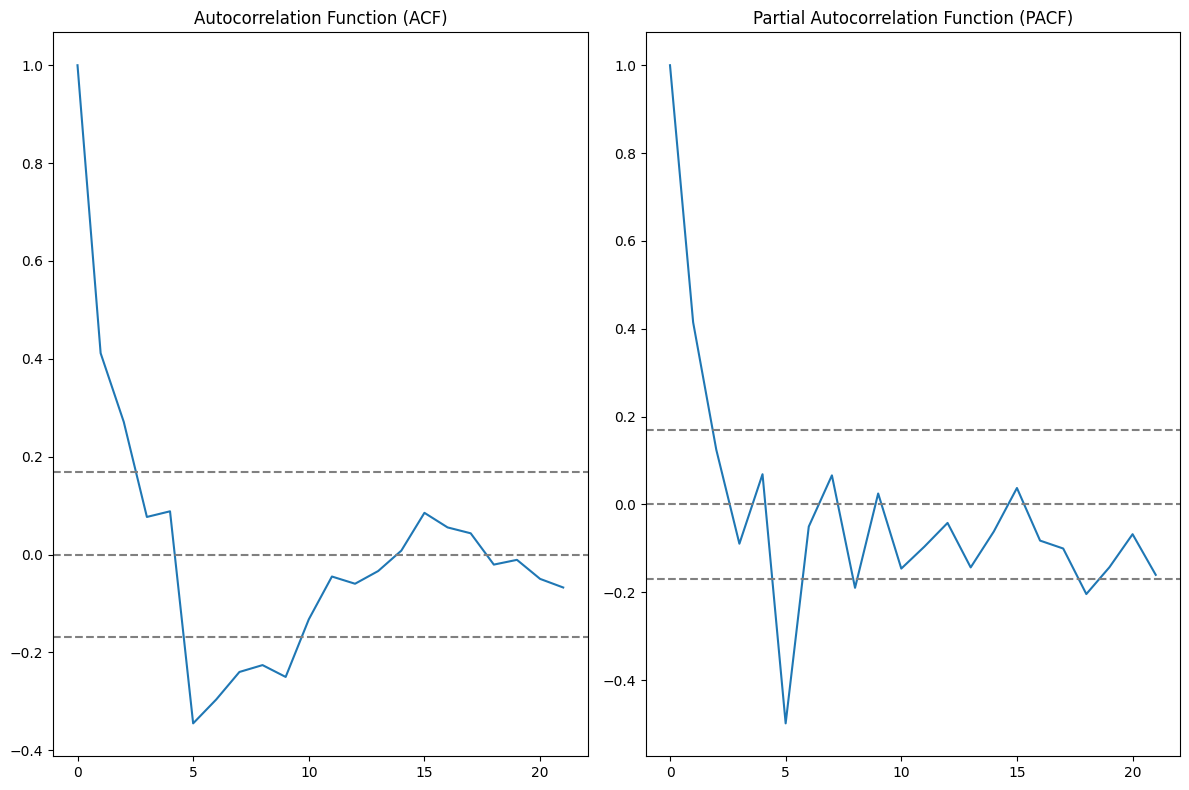

In [129]:
# Idetify P & Q values by plotting acf and pacf
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_new)
lag_pacf = pacf(df_new)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()


# Using ARIMA Model

In [131]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_new, order=(1, 1, 1))
model_fit = model.fit()

predictions = model_fit.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


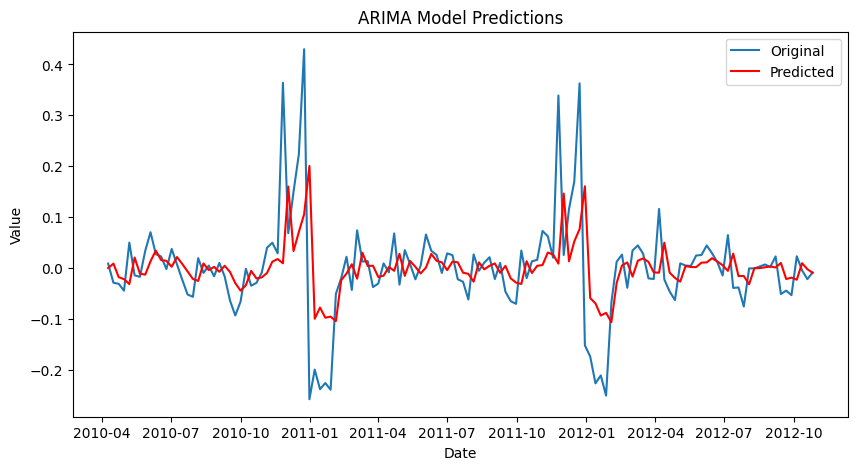

In [132]:
plt.figure(figsize=(10, 5))
plt.plot(df_new, label='Original')
plt.plot(predictions, label='Predicted', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [136]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Forecast sales for each store
predictions = {}
for store in df['Store'].unique():
    store_data = df[df['Store'] == store].set_index('Date')['Weekly_Sales']
    train_size = int(len(store_data) * 0.8)
    train, test = store_data[:train_size], store_data[train_size:]

    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=12)
    predictions[store] = forecast

# Display predictions
for store, forecast in predictions.items():
    print(f'Store {store} - Forecasted Sales for Next 12 Weeks:\n', forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

Store 1 - Forecasted Sales for Next 12 Weeks:
 2012-04-13    14.342754
2012-04-20    14.307911
2012-04-27    14.297303
2012-05-04    14.294073
2012-05-11    14.293089
2012-05-18    14.292790
2012-05-25    14.292699
2012-06-01    14.292671
2012-06-08    14.292662
2012-06-15    14.292660
2012-06-22    14.292659
2012-06-29    14.292659
Freq: W-FRI, Name: predicted_mean, dtype: float64
Store 2 - Forecasted Sales for Next 12 Weeks:
 2012-04-13    14.515166
2012-04-20    14.490008
2012-04-27    14.478708
2012-05-04    14.473632
2012-05-11    14.471353
2012-05-18    14.470329
2012-05-25    14.469869
2012-06-01    14.469663
2012-06-08    14.469570
2012-06-15    14.469528
2012-06-22    14.469509
2012-06-29    14.469501
Freq: W-FRI, Name: predicted_mean, dtype: float64
Store 3 - Forecasted Sales for Next 12 Weeks:
 2012-04-13    13.052823
2012-04-20    13.019423
2012-04-27    13.004741
2012-05-04    12.998288
2012-05-11    12.995451
2012-05-18    12.994204
2012-05-25    12.993656
2012-06-01    1

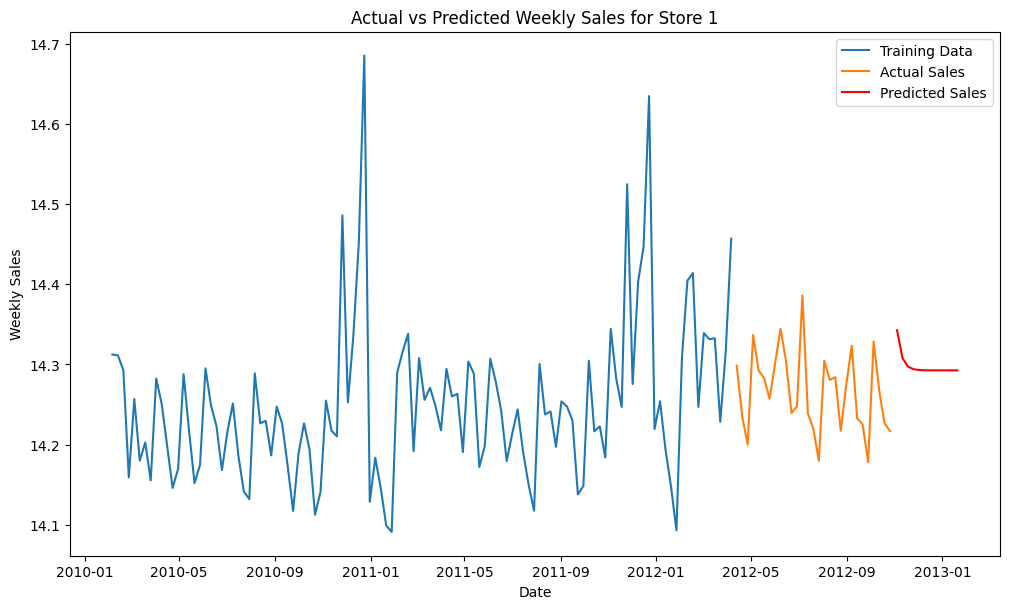

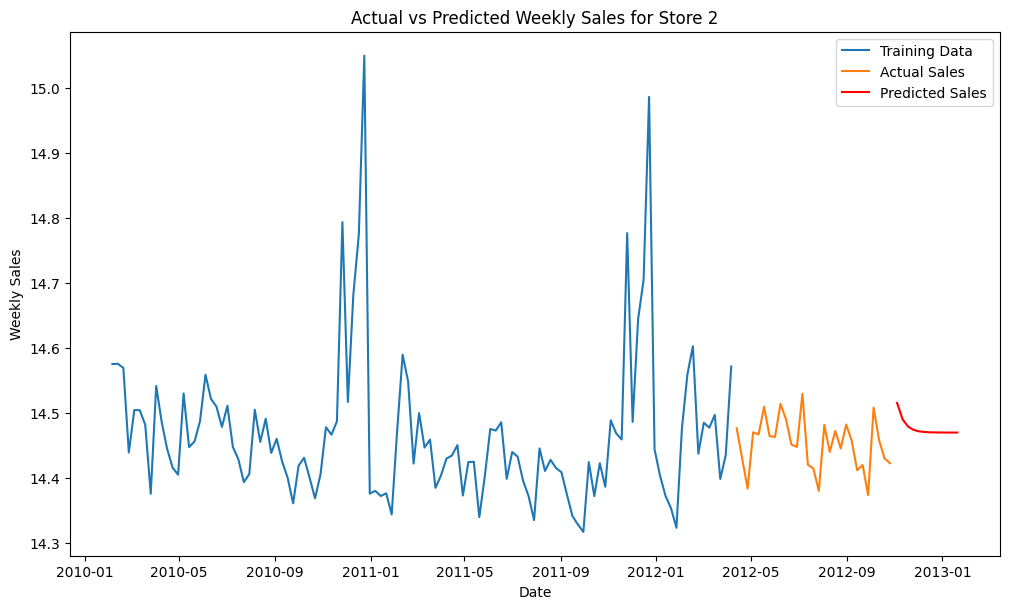

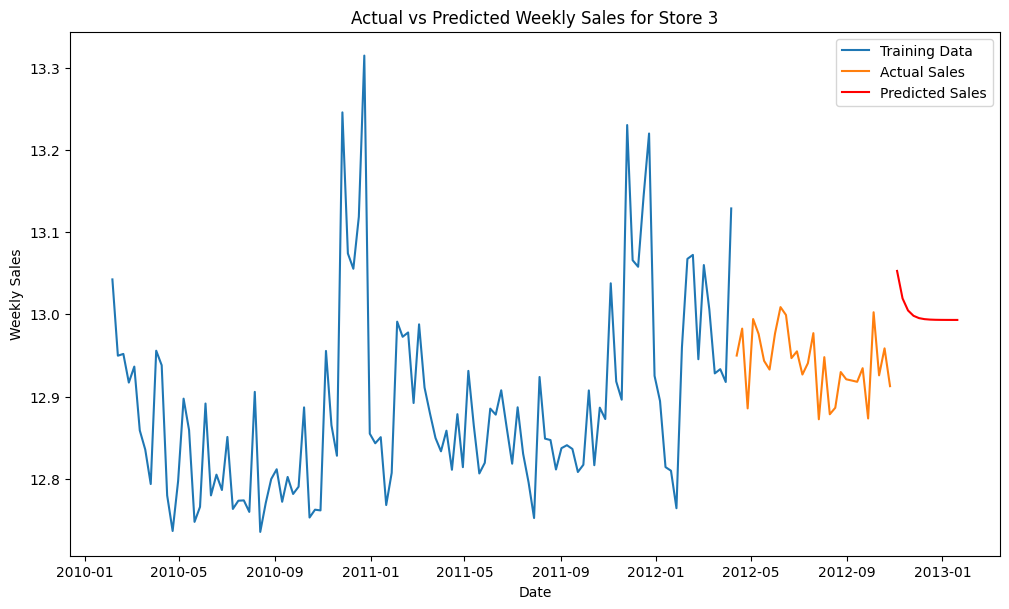

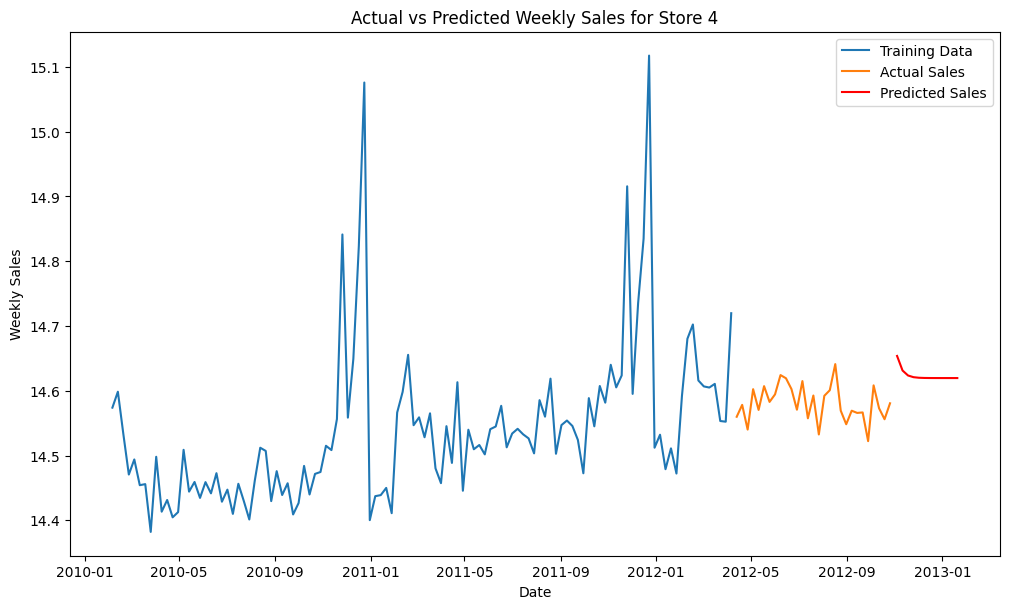

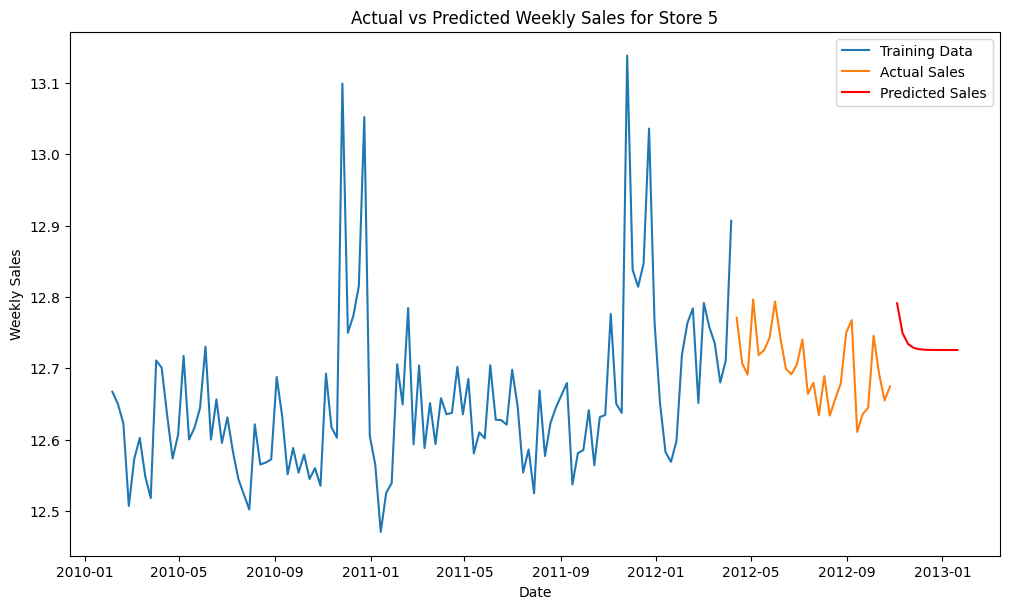

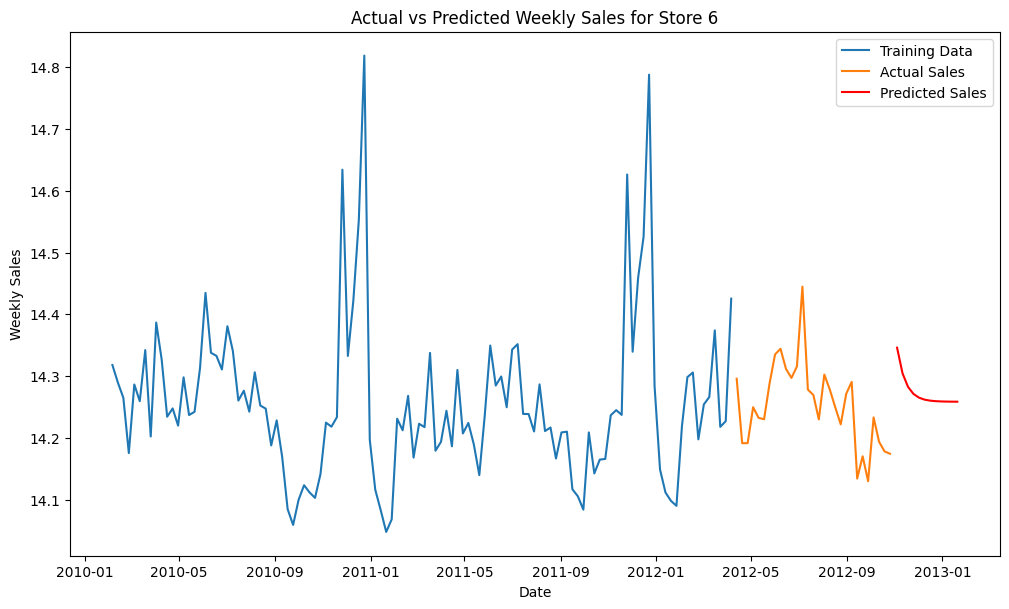

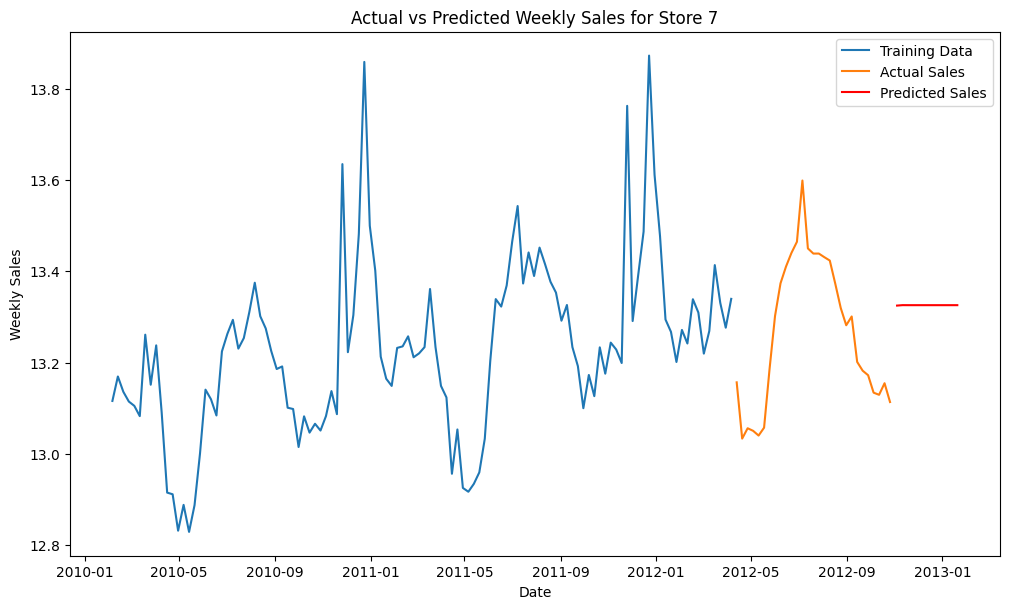

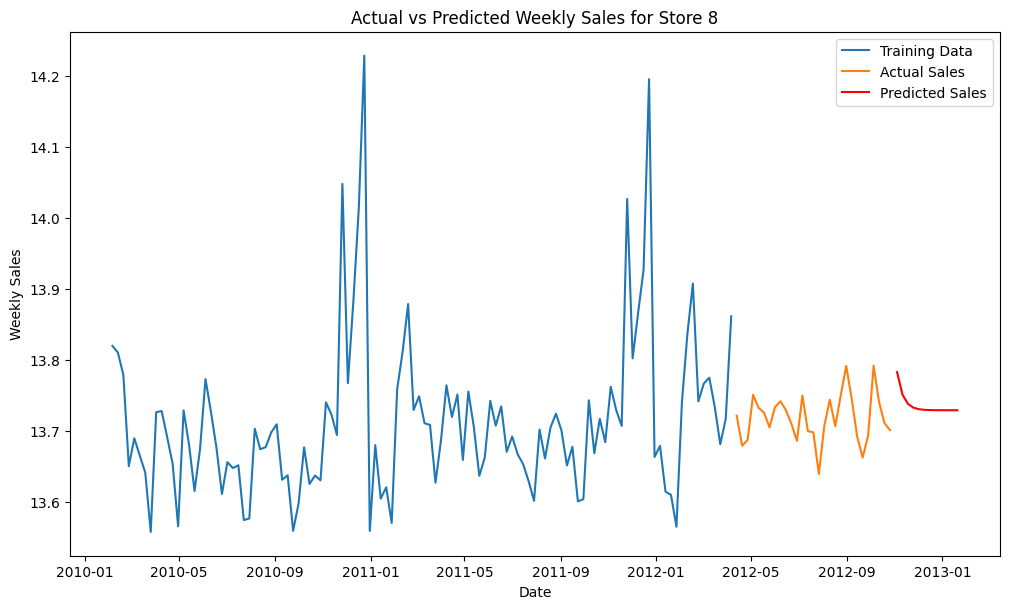

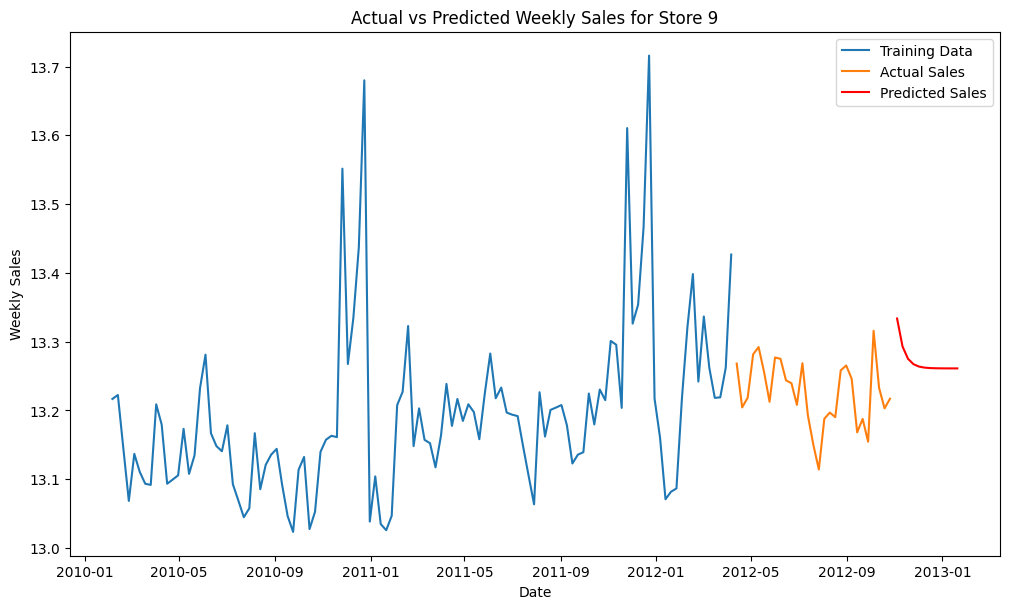

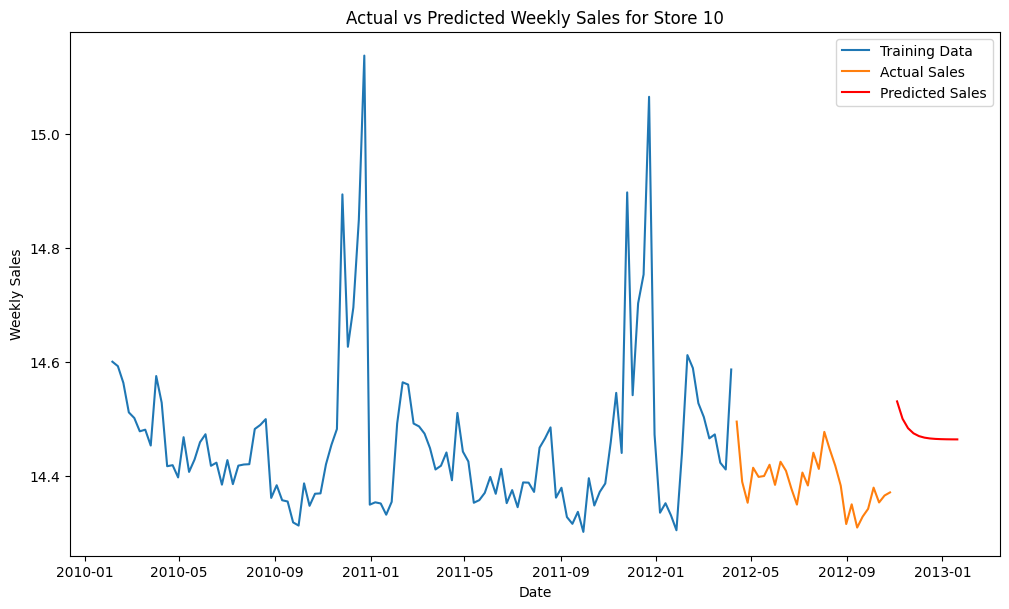

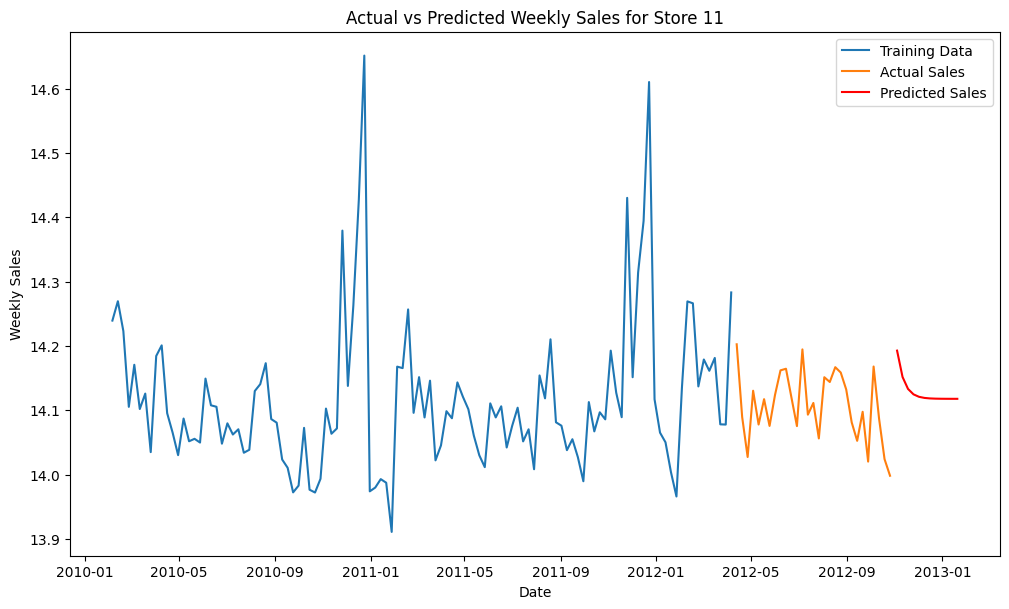

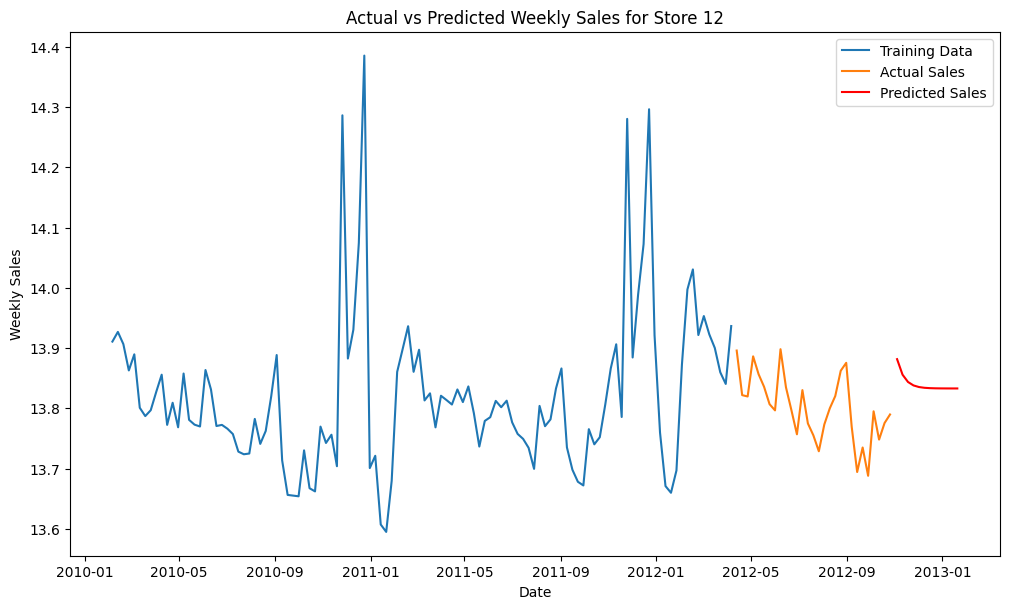

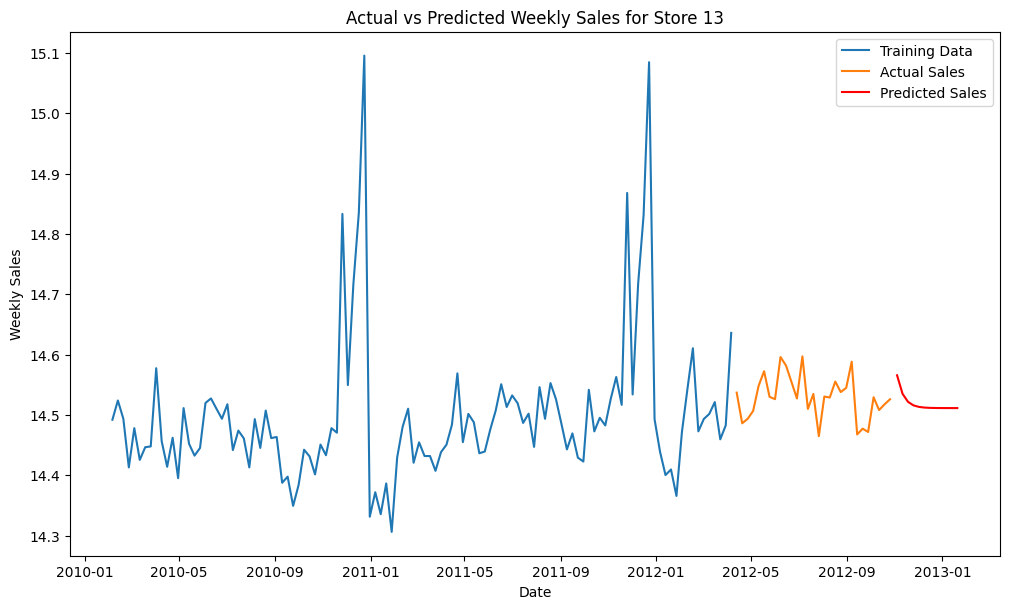

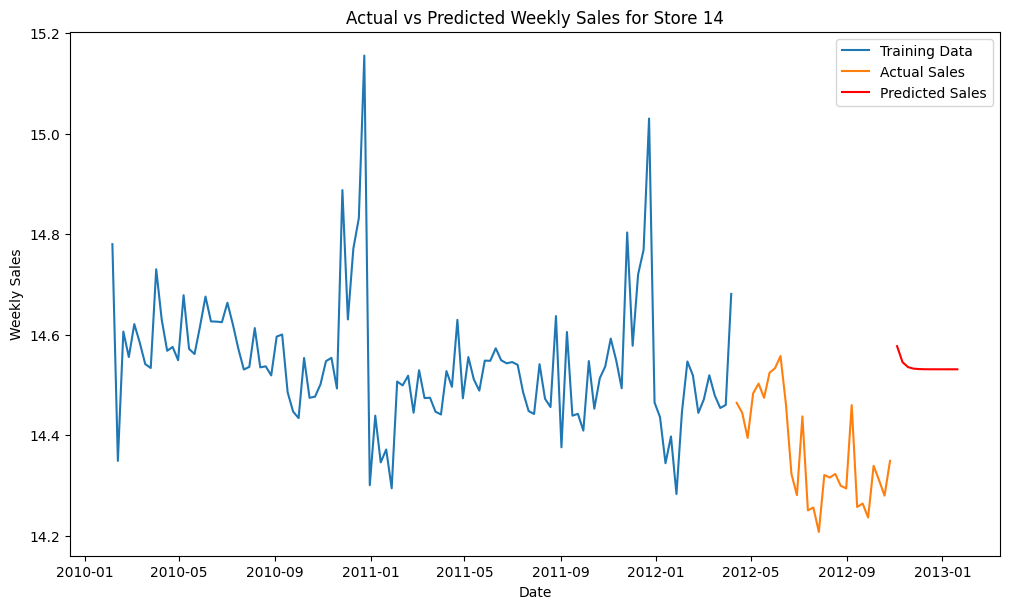

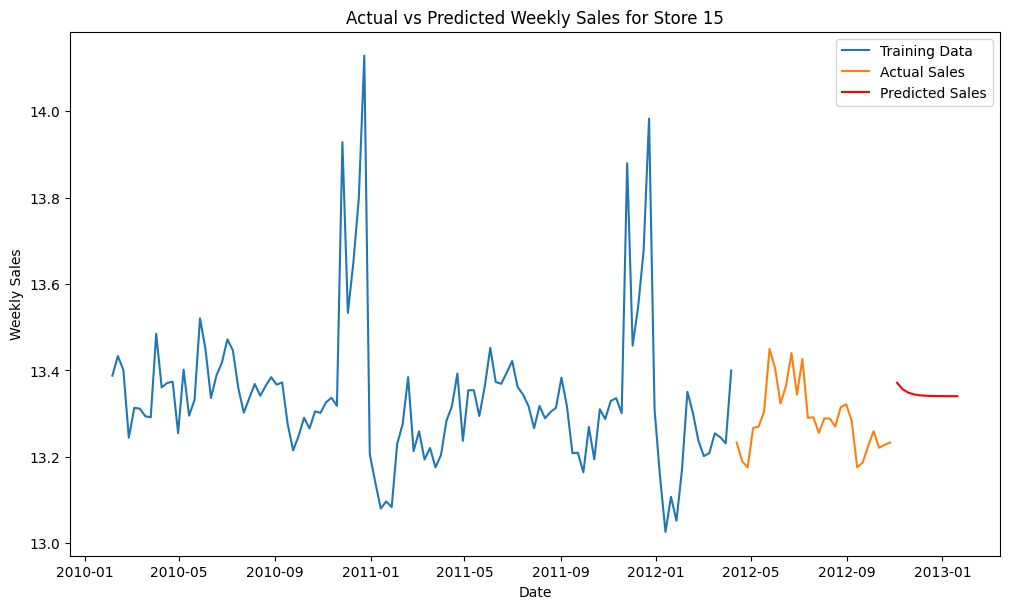

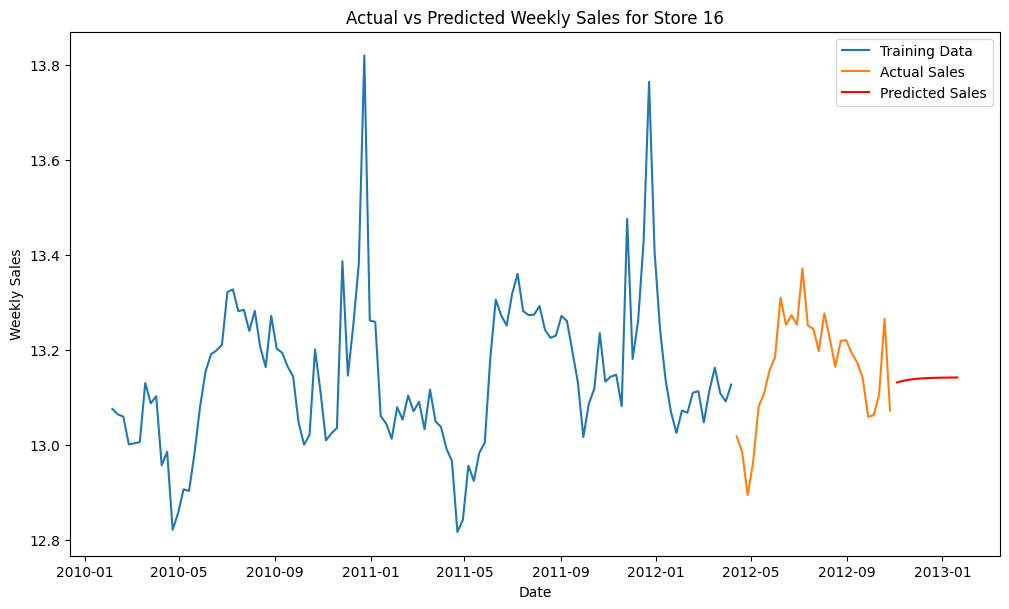

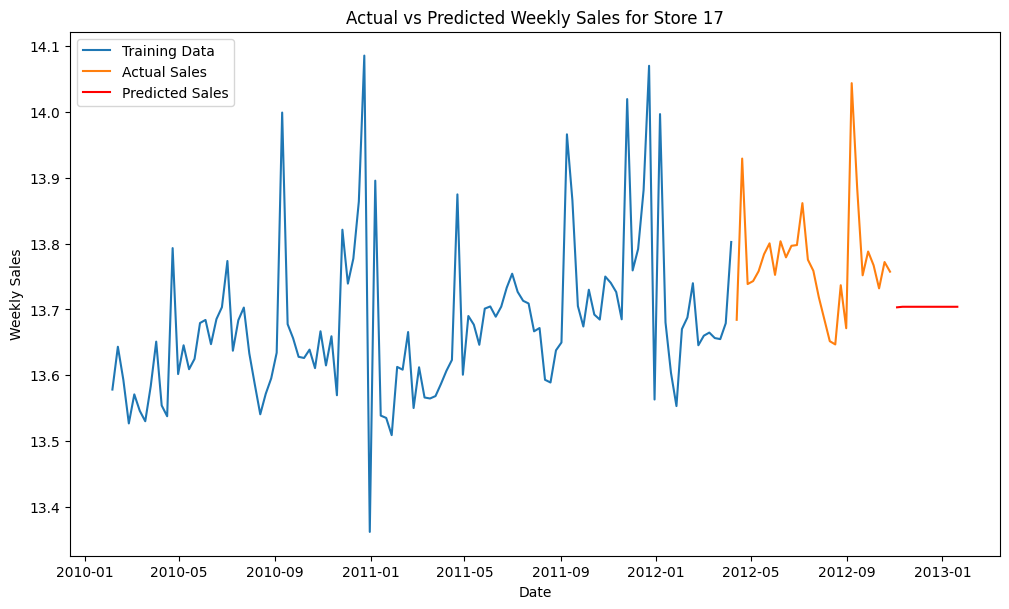

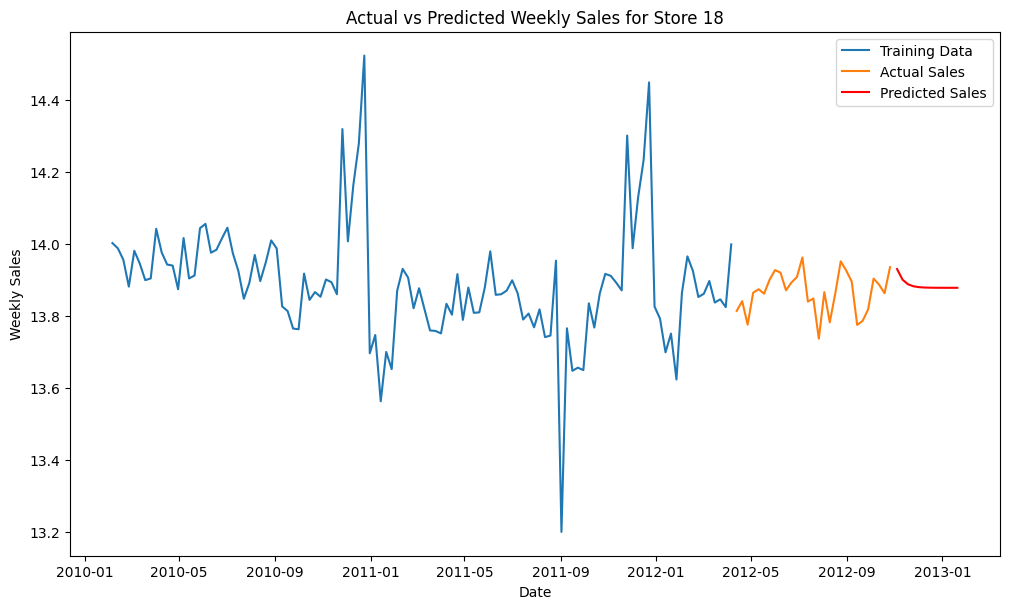

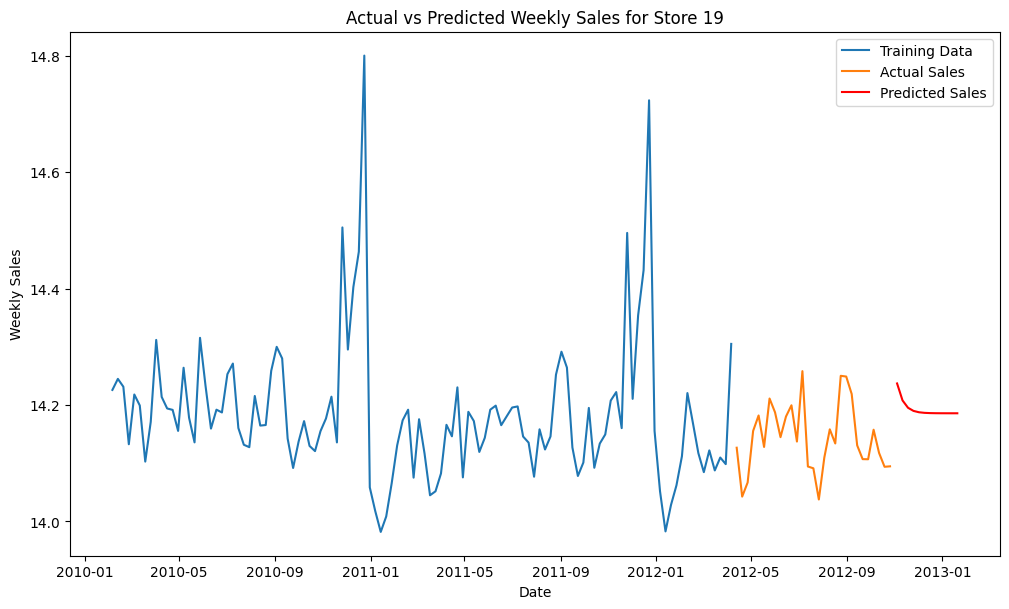

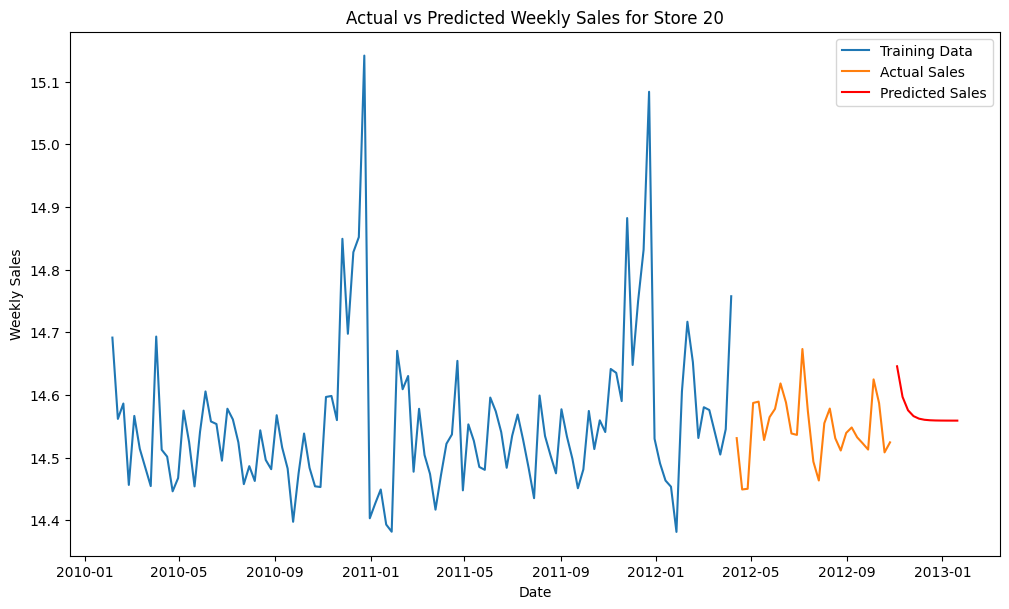

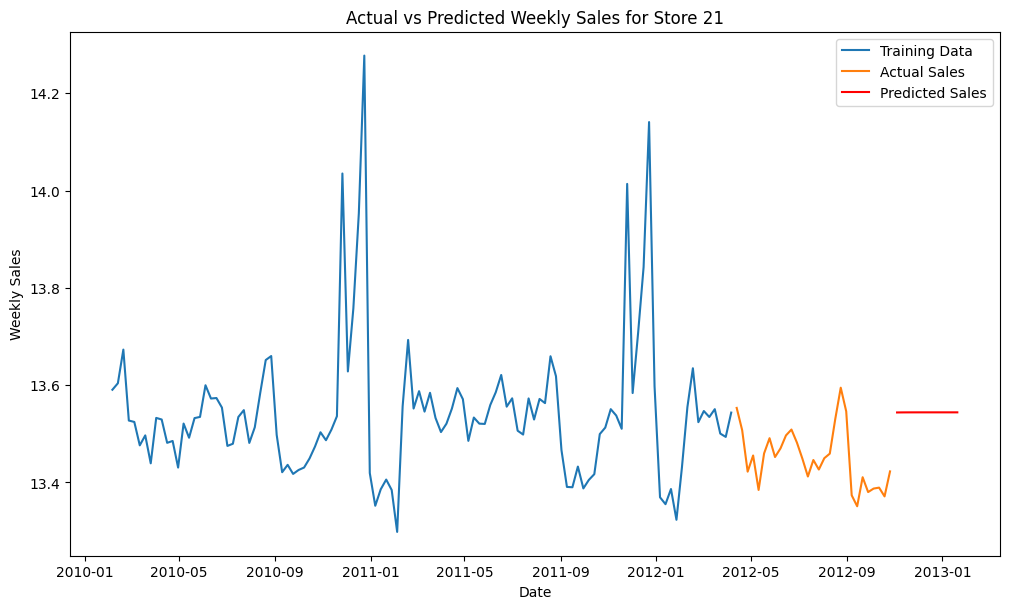

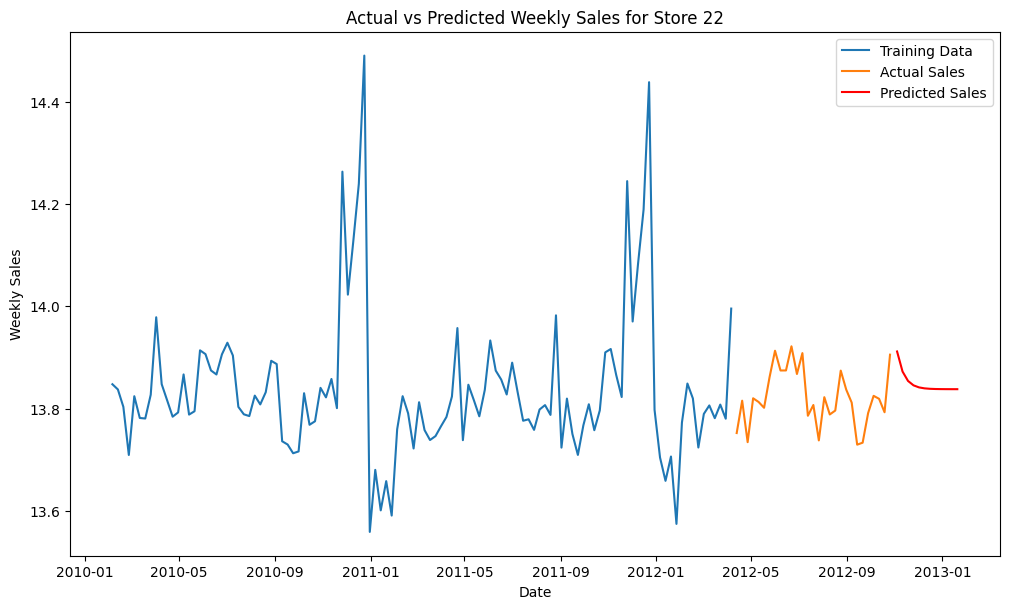

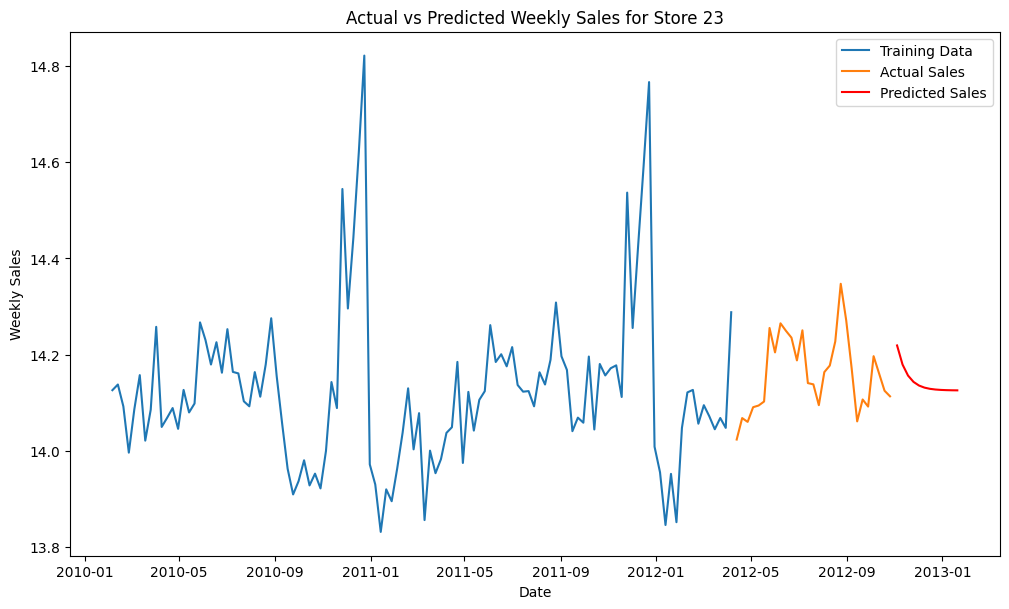

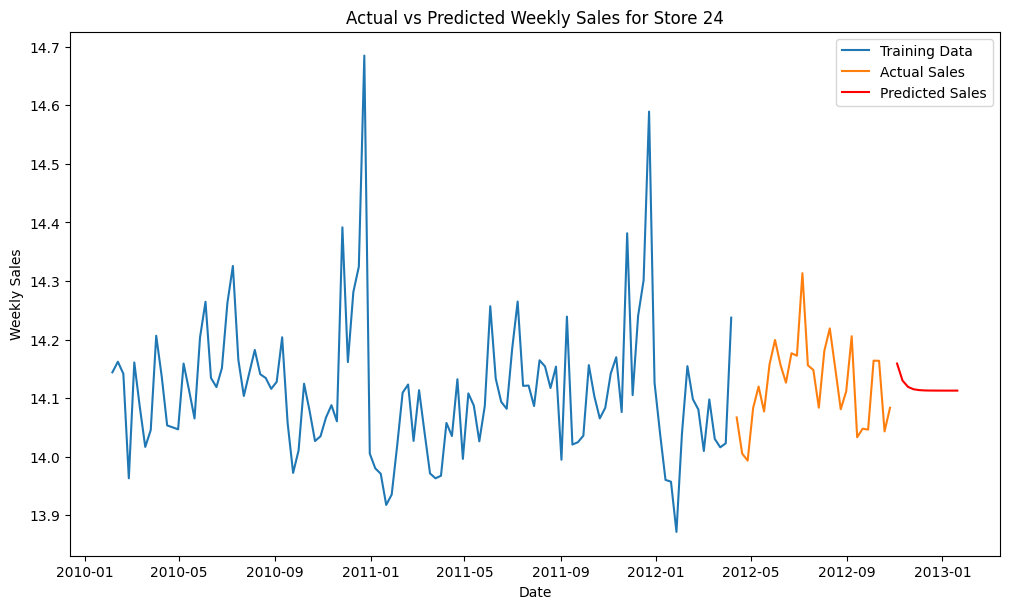

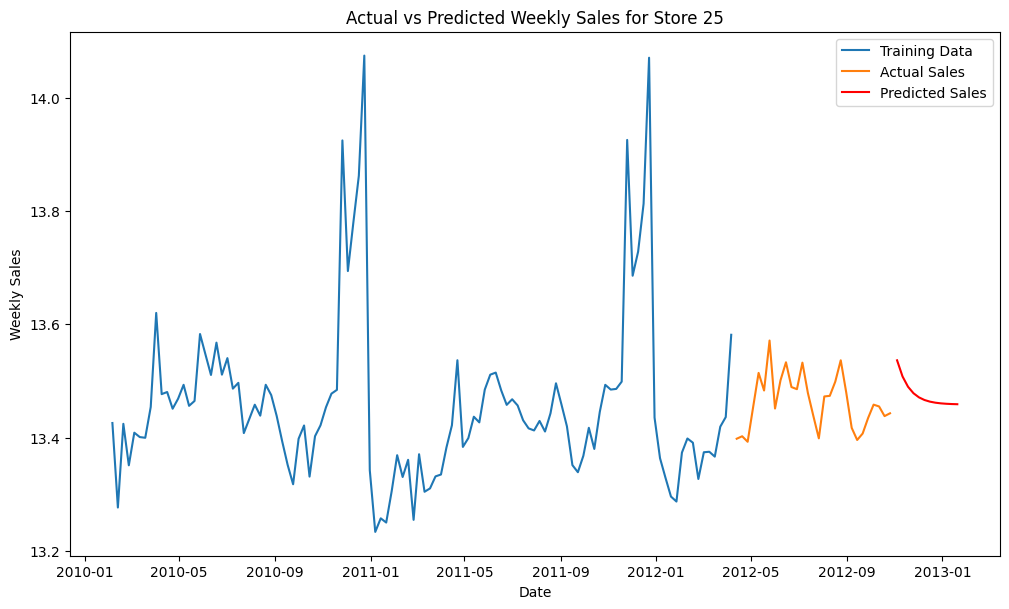

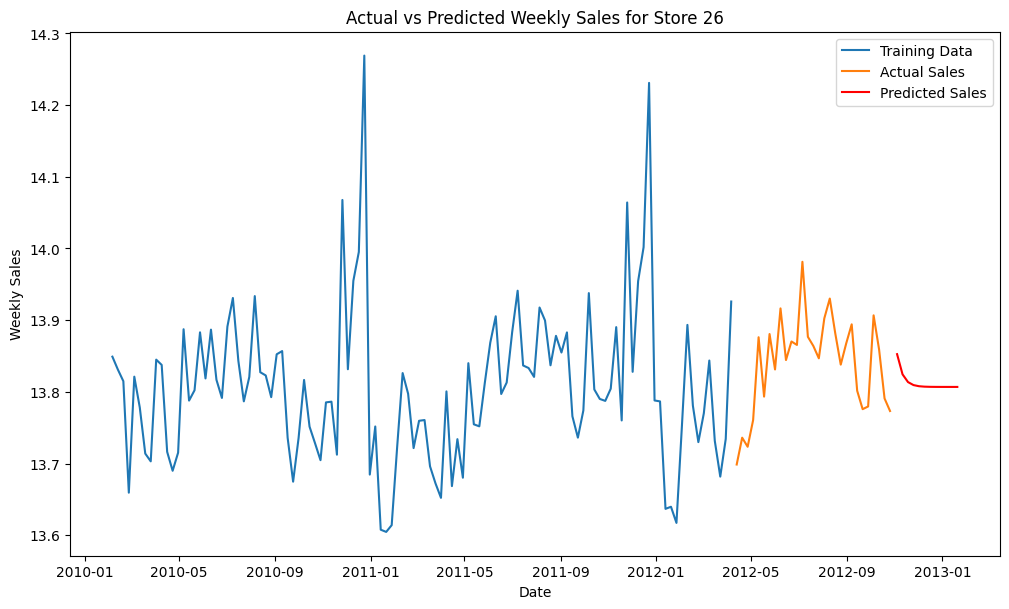

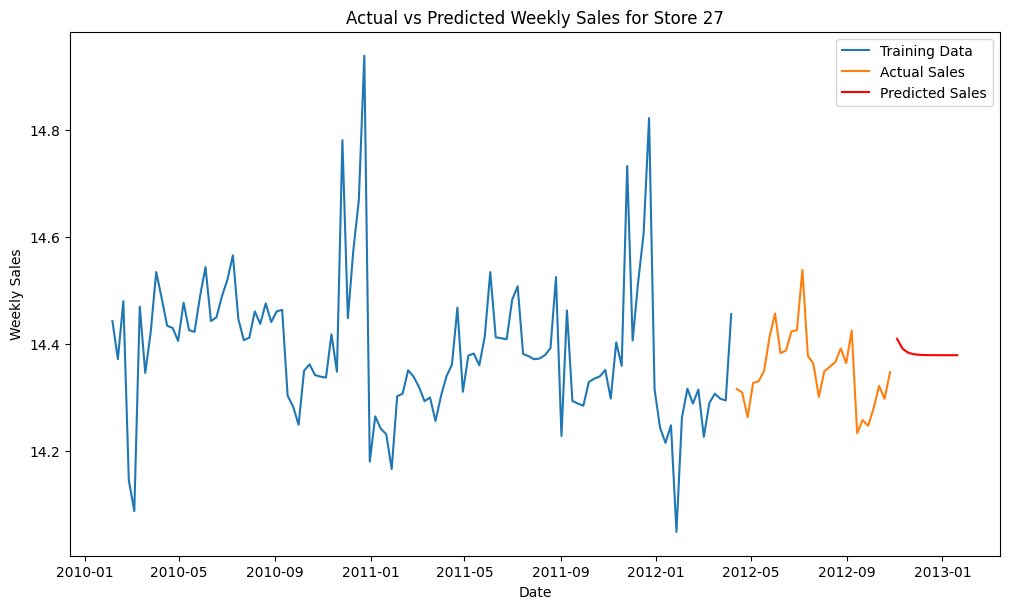

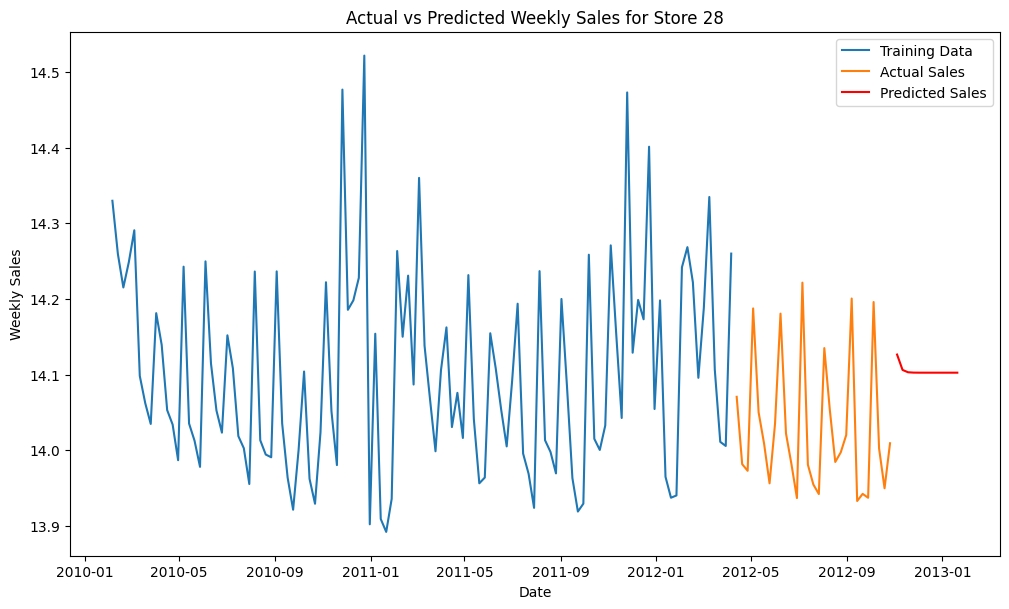

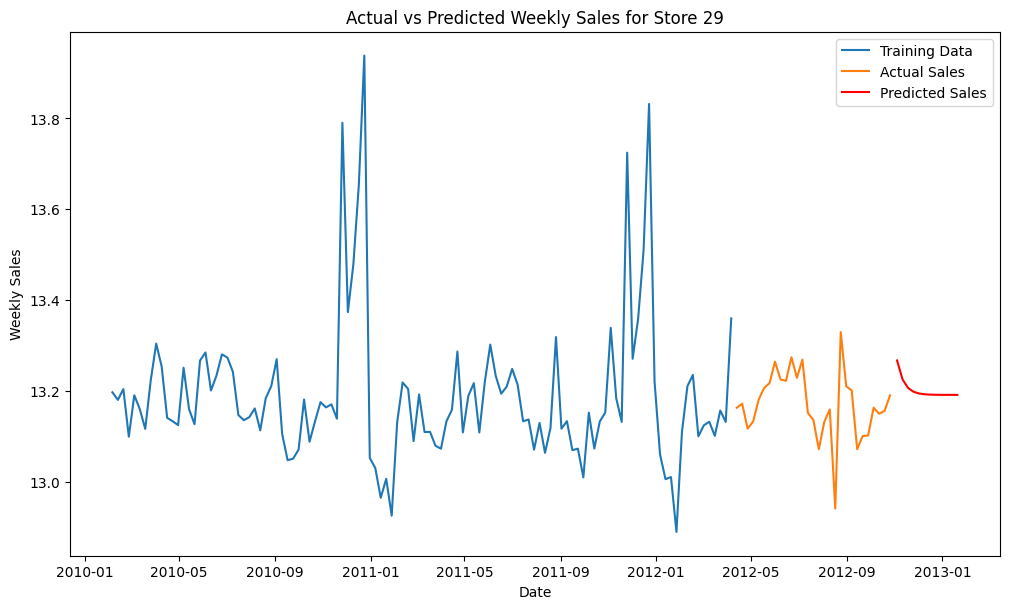

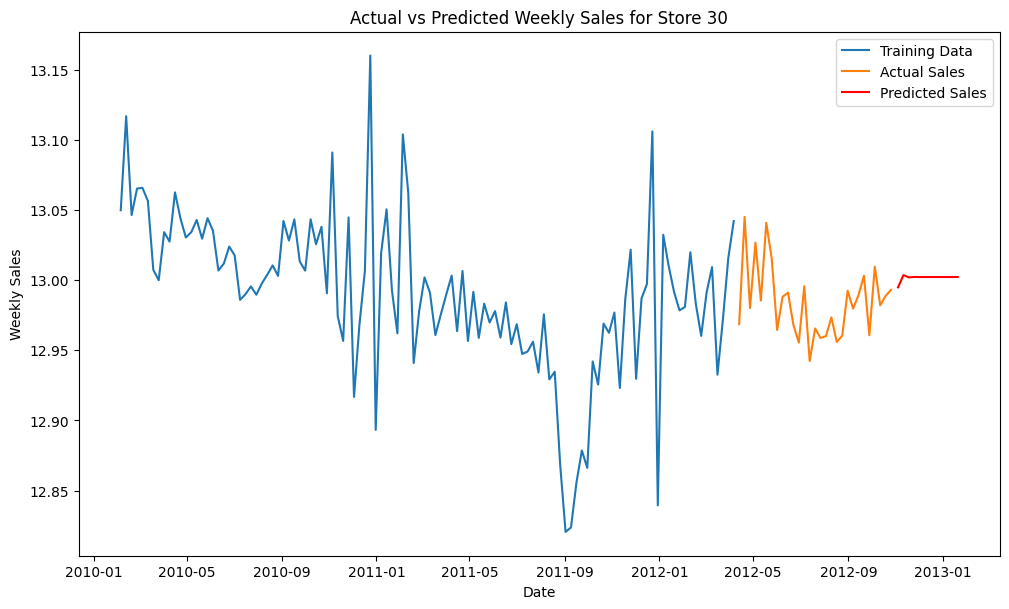

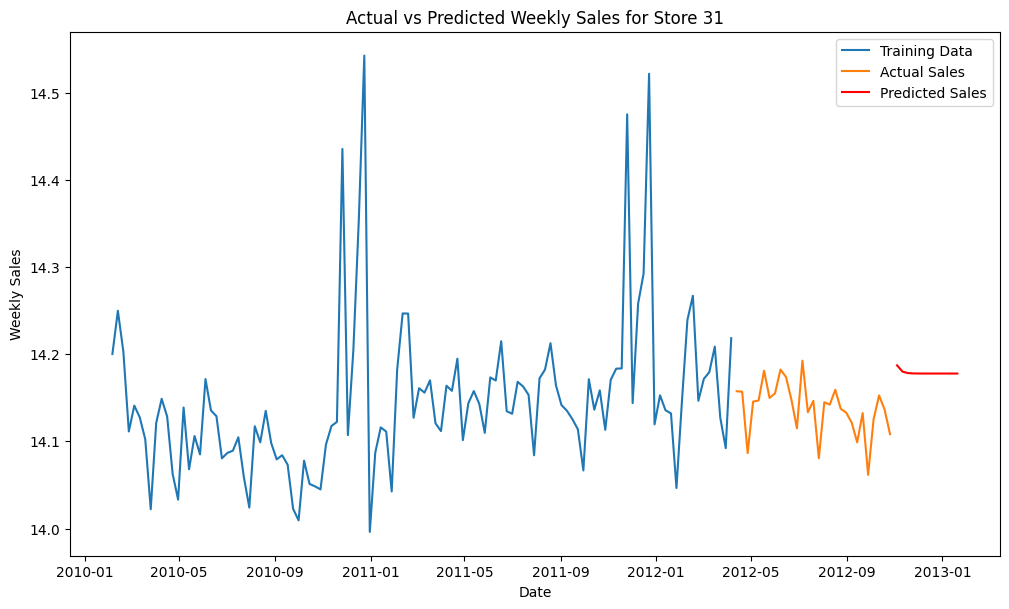

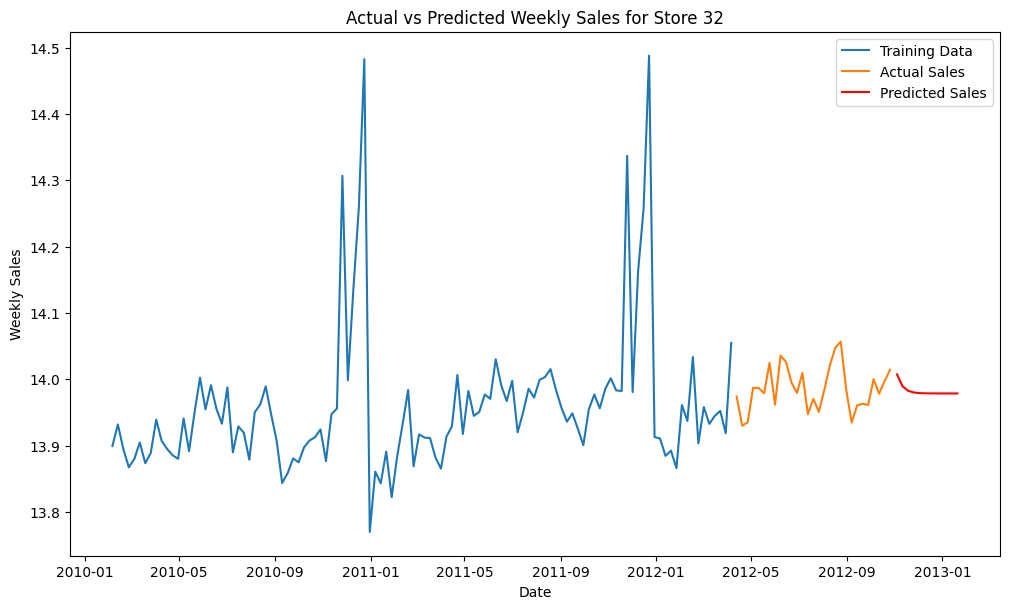

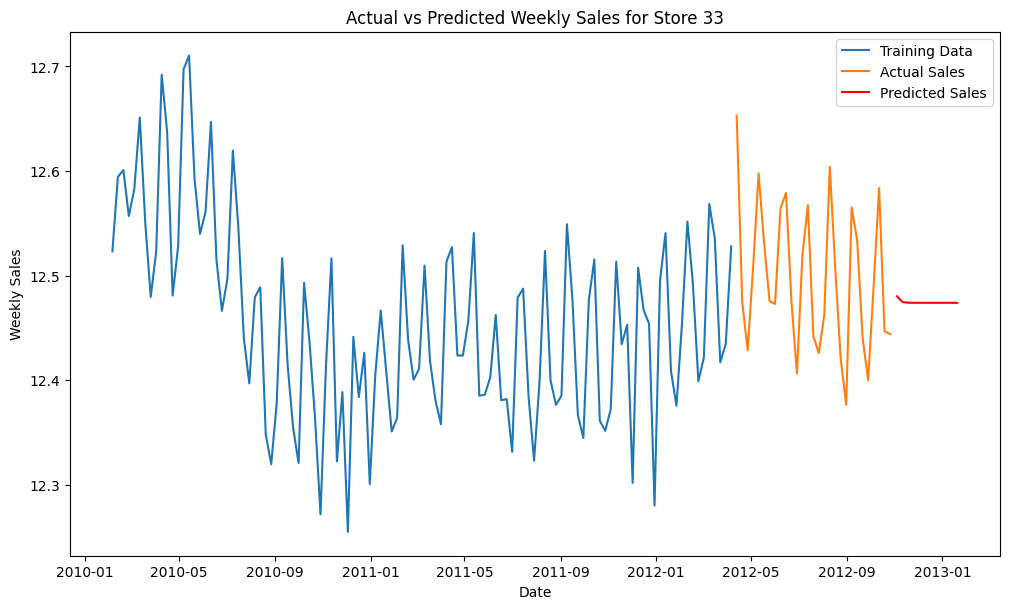

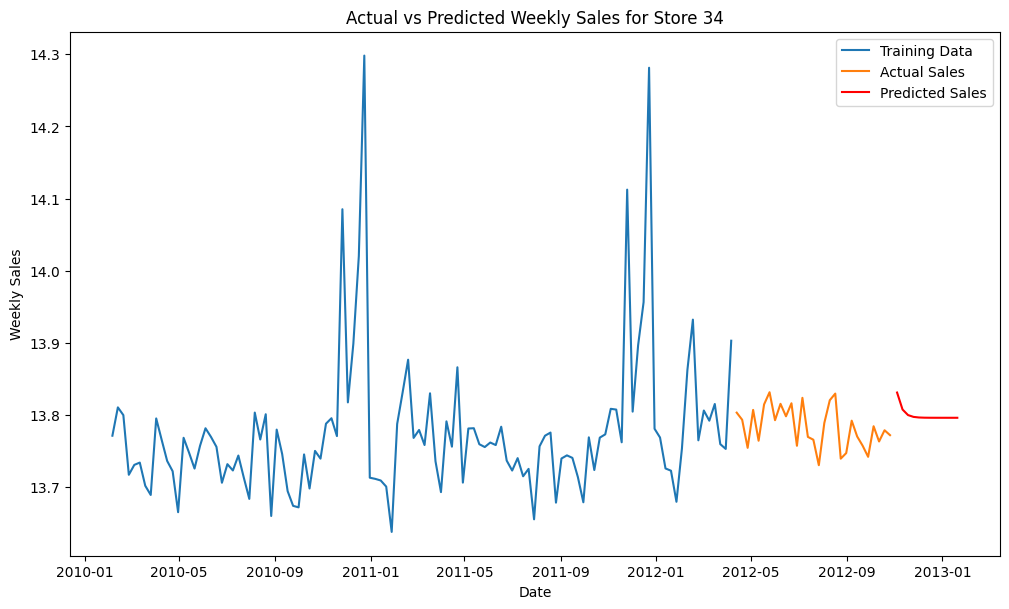

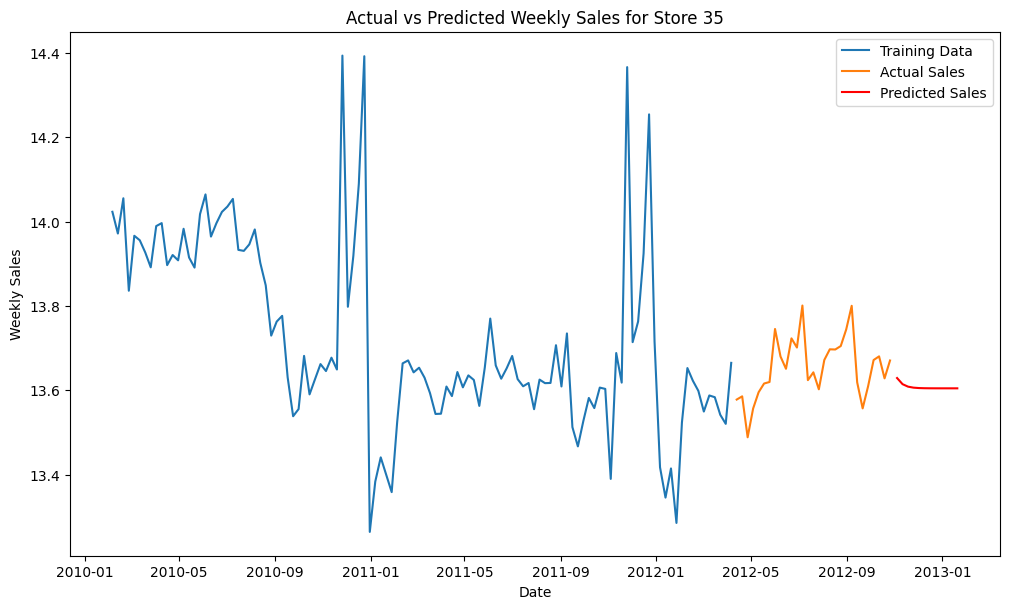

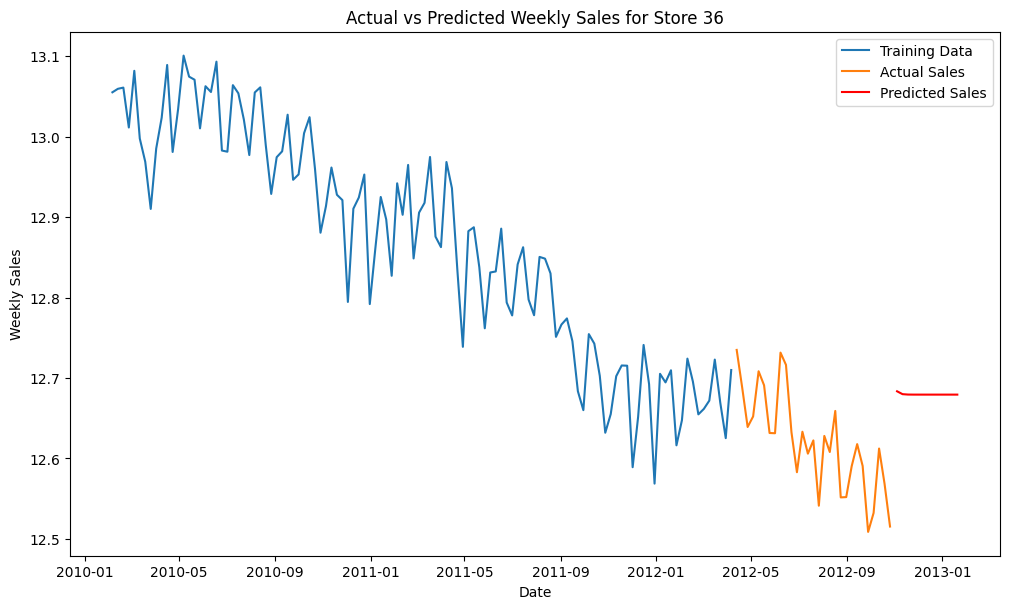

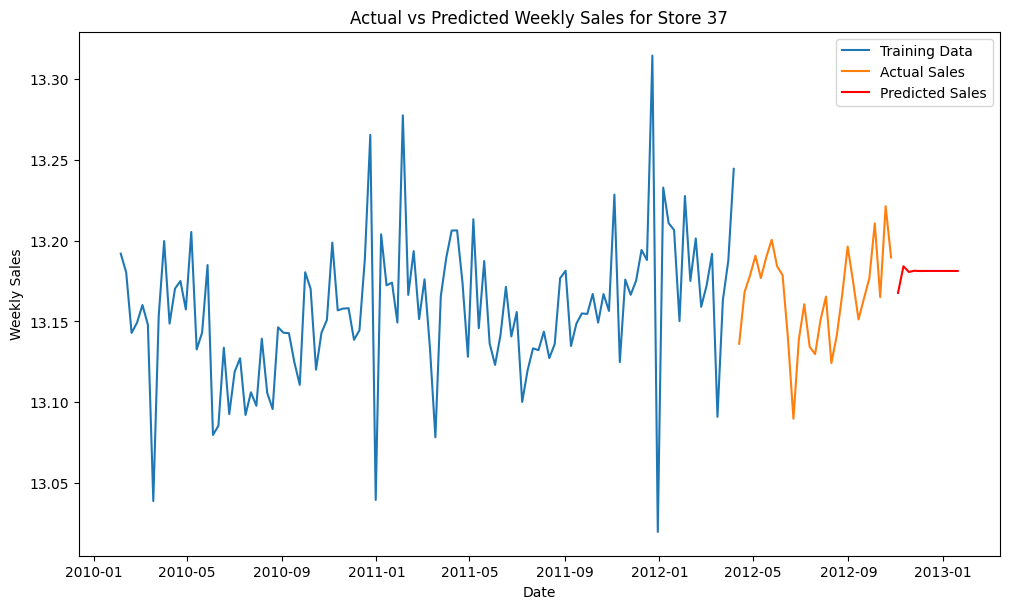

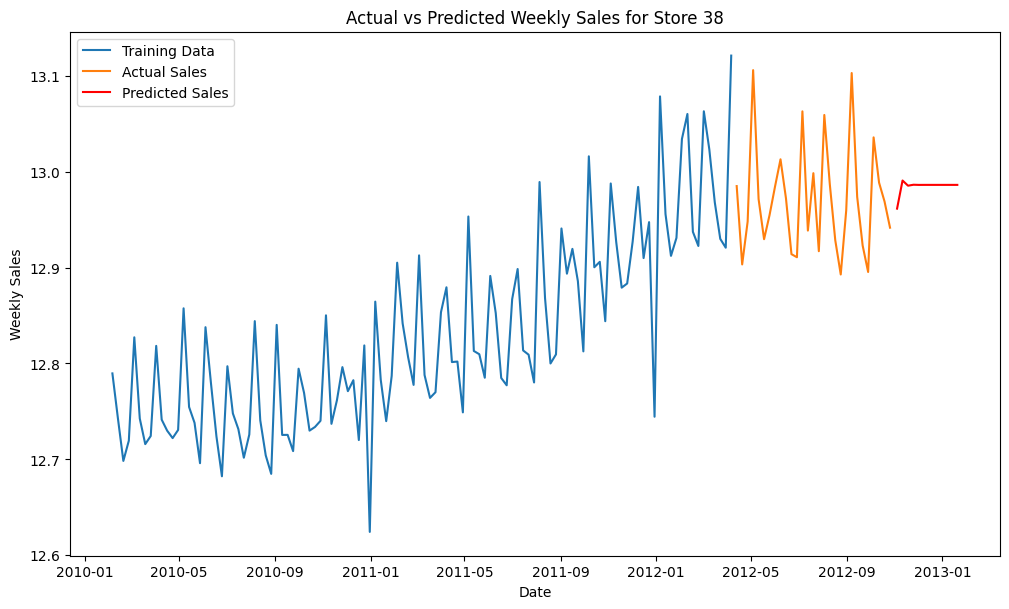

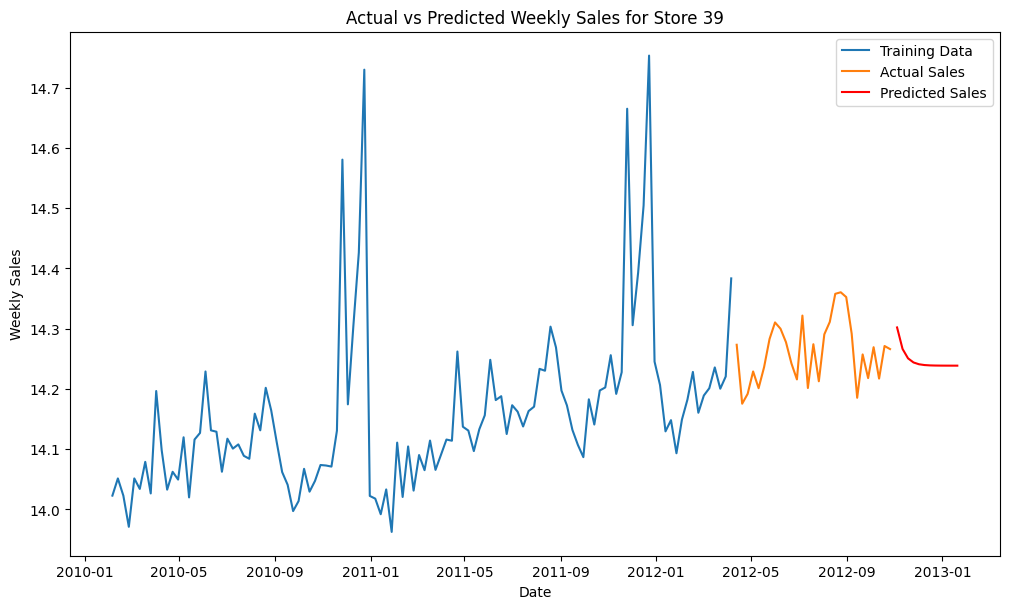

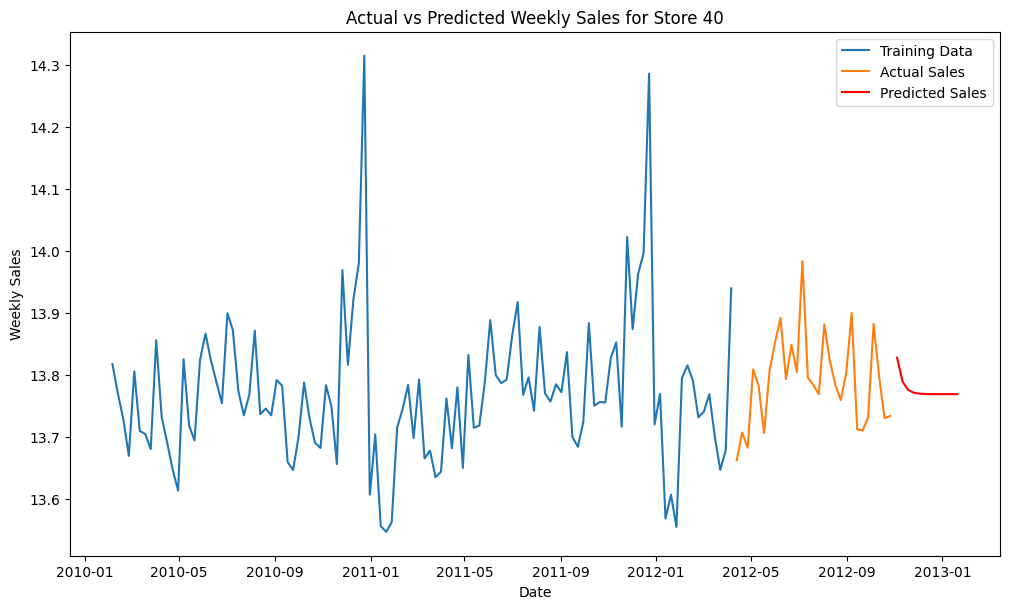

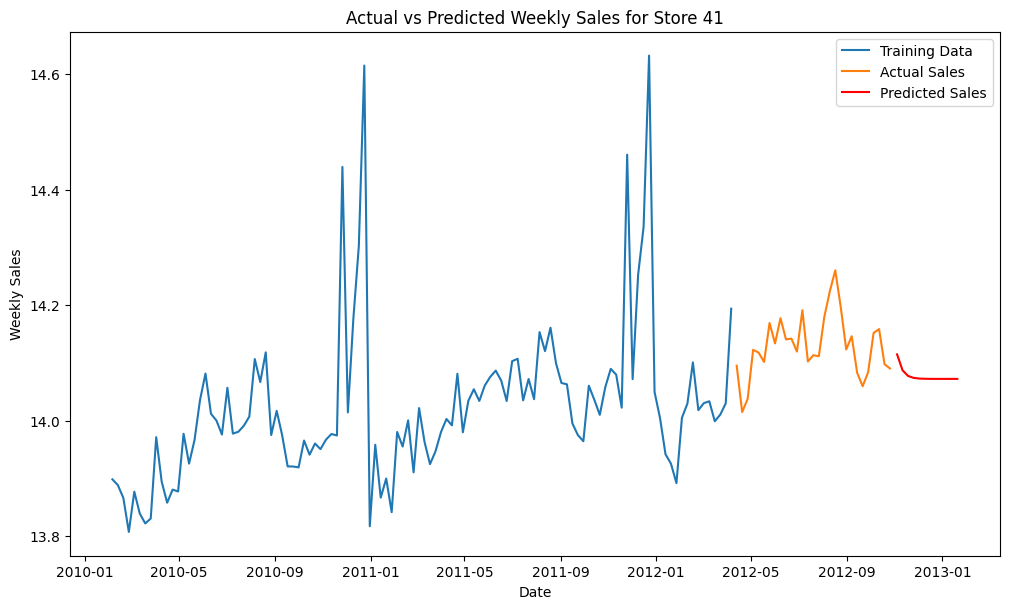

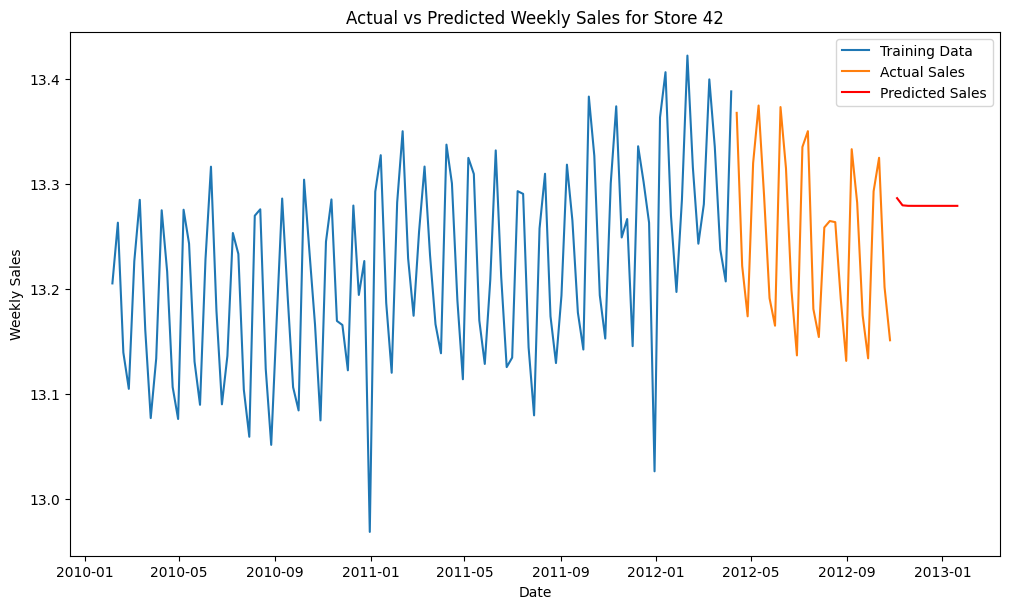

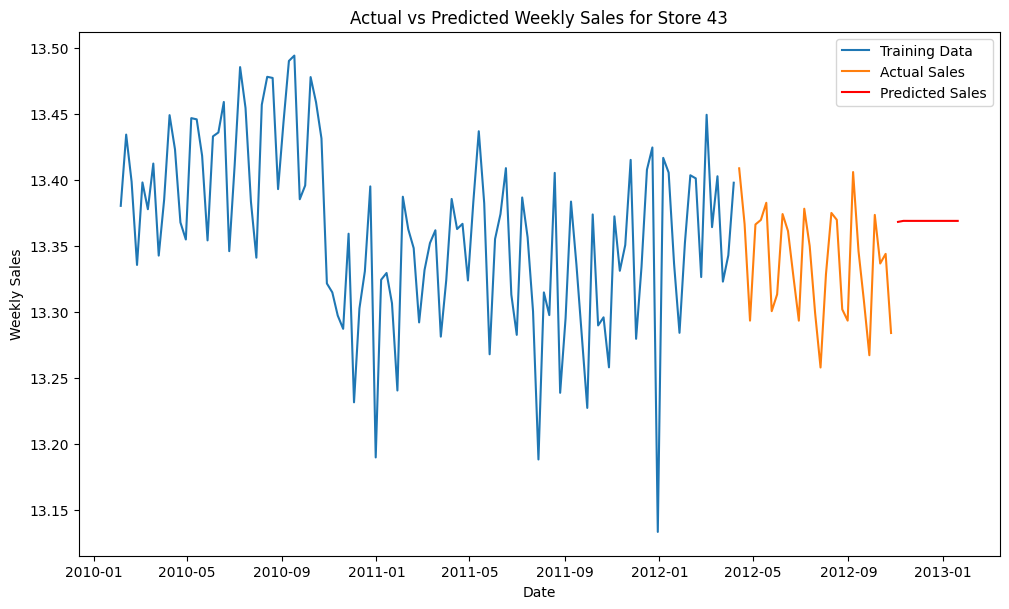

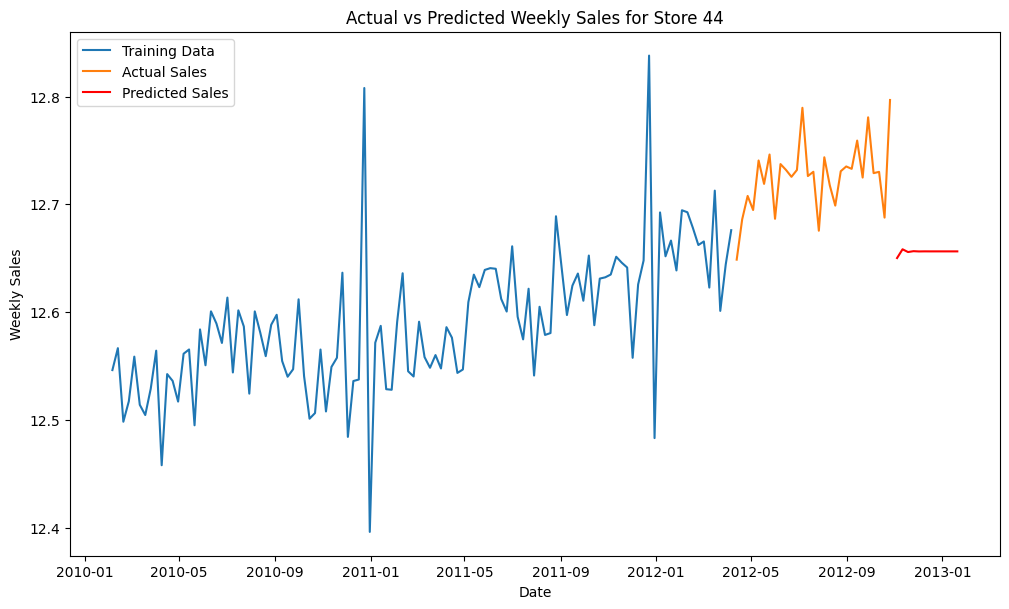

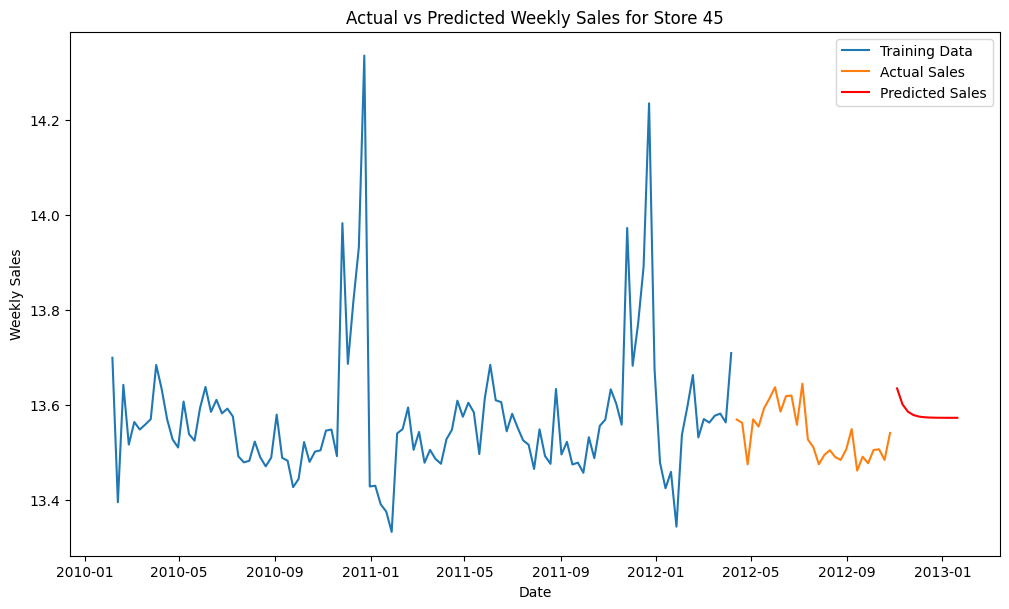

In [139]:
# Plot the actual and predicted values of all the stores

for store, forecast in predictions.items():
    store_data = df[df['Store'] == store].set_index('Date')['Weekly_Sales']
    train_size = int(len(store_data) * 0.8)
    train, test = store_data[:train_size], store_data[train_size:]

    # Create a date range for the forecast
    forecast_index = pd.date_range(start=test.index[-1], periods=len(forecast) + 1, freq='W')[1:]
    #This is added so that both the x and y axis has the same date time range and values .

    plt.figure(figsize=(10, 6))
    plt.plot(train, label='Training Data')
    plt.plot(test, label='Actual Sales')
    plt.plot(forecast_index, forecast, label='Predicted Sales', color='red')  #Plot against the forecast index
    plt.title(f'Actual vs Predicted Weekly Sales for Store {store}')
    plt.tight_layout()
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()